In [ ]:


#Load xls file into Pandas

ZoomInfo Churn Reduction Case Study

Goal: Develop actionable insights and recommendations for ZoomInfo customer experience 

Exploratory Data Analysis

In [185]:
#Load the data from xls file into Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data dictionary (extra spacing in xls requires droping first row and column)
data_dict = pd.read_excel('../data/churn_data.xlsx', sheet_name = 'Data Dict',index_col = None, header = 1)
data_dict= data_dict.drop(data_dict.columns[0],axis = 1)
data_dict = data_dict.rename(columns = {'Discerption':'Description'})

# Load the main set
df = pd.read_excel('../data/churn_data.xlsx', sheet_name = 'E Comm', header = 0)

In [186]:
data_dict

Data                     Variable  \
0   E Comm                   CustomerID   
1   E Comm                        Churn   
2   E Comm                       Tenure   
3   E Comm         PreferredLoginDevice   
4   E Comm                     CityTier   
5   E Comm              WarehouseToHome   
6   E Comm         PreferredPaymentMode   
7   E Comm                       Gender   
8   E Comm               HourSpendOnApp   
9   E Comm     NumberOfDeviceRegistered   
10  E Comm             PreferedOrderCat   
11  E Comm            SatisfactionScore   
12  E Comm                MaritalStatus   
13  E Comm              NumberOfAddress   
14  E Comm                     Complain   
15  E Comm  OrderAmountHikeFromlastYear   
16  E Comm                   CouponUsed   
17  E Comm                   OrderCount   
18  E Comm            DaySinceLastOrder   
19  E Comm               CashbackAmount   

                                          Description  
0                                  Unique customer ID  
1                                          Churn Flag  
2                  Tenure of customer in organization  
3                  Preferred login device of customer  
4                                           City tier  
5   Distance in between warehouse to home of customer  
6                Preferred payment method of customer  
7                                  Gender of customer  
8   Number of hours spend on mobile application or...  
9   Total number of deceives is registered on part...  
10  Preferred order category of customer in last m...  
11          Satisfactory score of customer on service  
12                         Marital status of customer  
13  Total number of added added on particular cust...  
14        Any complaint has been raised in last month  
15       Percentage increases in order from last year  
16  Total number of coupon has been used in last m...  
17  Total number of orders has been places in last...  
18                   Day Since last order by customer  
19                     Average cashback in last month

Notes on data dict:

Churn - 1 is cancellation, 0 is retention? no, its e-comm, probably no sales for a month?   
Tenure - Probably months?  
Preferred Login Device - Mobile Phone, Phone, Computer... (combine Mobile Phone, Phone?)  
City Tier - 1 is probably the best  
Distance to Warehouse - Warehouse? This company is probably not ZoomInfo  
Preferred Payment Method - Credit Card, Debit Card, E-Wallet ...  





In [716]:
#Write a function that merges all cases in a column into a single case
def merge_cases(df, column, cases, new_case):
    for case in cases:
        df[column] = df[column].replace(case, new_case)
    return df

In [188]:
df.columns 

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [189]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

Looks like the churn rate is about 17%

In [190]:
len(df.CustomerID.unique())

5630

In [685]:
nulls = df.isnull().sum()
nulls_df = nulls.reset_index()
nulls_df.columns = ['Column Name', 'Number of Nulls']
nulls_df.style.background_gradient(cmap='YlOrBr', subset=['Number of Nulls'])

Figure out if churn defined by a given metric

In [192]:
df_churn = df[df['Churn'] == 1]
df_retain = df[df['Churn'] == 0]

In [193]:
df_churn.describe()

CustomerID  Churn      Tenure    CityTier  WarehouseToHome  \
count    948.000000  948.0  867.000000  948.000000       864.000000   
mean   52746.575949    1.0    3.379469    1.827004        17.134259   
std     1637.490865    0.0    5.486089    0.959380         8.631132   
min    50001.000000    1.0    0.000000    1.000000         5.000000   
25%    51343.750000    1.0    0.000000    1.000000         9.000000   
50%    52811.500000    1.0    1.000000    1.000000        15.000000   
75%    54154.250000    1.0    3.000000    3.000000        24.000000   
max    55622.000000    1.0   21.000000    3.000000        36.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count      890.000000                948.000000         948.000000   
mean         2.961798                  3.934599           3.390295   
std          0.694427                  1.014127           1.342031   
min          2.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           3.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  5.000000           5.000000   
max          4.000000                  6.000000           5.000000   

       NumberOfAddress    Complain  OrderAmountHikeFromlastYear  CouponUsed  \
count       948.000000  948.000000                   934.000000  940.000000   
mean          4.466245    0.535865                    15.627409    1.717021   
std           2.790071    0.498975                     3.812084    1.902503   
min           1.000000    0.000000                    11.000000    0.000000   
25%           2.000000    0.000000                    13.000000    1.000000   
50%           3.000000    1.000000                    14.000000    1.000000   
75%           6.000000    1.000000                    18.000000    2.000000   
max          20.000000    1.000000                    26.000000   16.000000   

       OrderCount  DaySinceLastOrder  CashbackAmount  
count  930.000000         894.000000      948.000000  
mean     2.823656           3.236018      160.370928  
std      2.809924           3.415137       38.436055  
min      1.000000           0.000000      110.090000  
25%      1.000000           1.000000      132.020000  
50%      2.000000           2.000000      149.660000  
75%      3.000000           5.000000      174.690000  
max     16.000000          46.000000      323.590000

In [194]:
df_retain.describe()

CustomerID   Churn       Tenure     CityTier  WarehouseToHome  \
count   4682.000000  4682.0  4499.000000  4682.000000      4515.000000   
mean   52829.455575     0.0    11.502334     1.619821        15.353931   
std     1622.742772     0.0     8.419217     0.902332         8.483276   
min    50027.000000     0.0     0.000000     1.000000         5.000000   
25%    51422.250000     0.0     5.000000     1.000000         9.000000   
50%    52828.500000     0.0    10.000000     1.000000        13.000000   
75%    54236.750000     0.0    17.000000     3.000000        19.000000   
max    55630.000000     0.0    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     4485.000000               4682.000000        4682.000000   
mean         2.925530                  3.639257           3.001282   
std          0.727184                  1.018910           1.378722   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      4682.000000  4682.000000                  4431.000000  4434.000000   
mean          4.162965     0.234088                    15.724893     1.758232   
std           2.537001     0.423473                     3.646256     1.893083   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           5.000000     0.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  4442.000000        4429.000000     4682.000000  
mean      3.046601           4.807406      180.635203  
std       2.964982           3.644758       50.434791  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      147.240000  
50%       2.000000           4.000000      166.115000  
75%       3.000000           8.000000      201.250000  
max      16.000000          31.000000      324.990000

Nope, I suppose if this is churn prediction, the data is based on months prior to churn

In [195]:
#Ok time to start looking at the data

# List of columns to compare
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome',
                     'HourSpendOnApp', 'NumberOfDeviceRegistered',
                    'SatisfactionScore',  'NumberOfAddress',
                      'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                      'DaySinceLastOrder', 'CashbackAmount']

# Convert the DataFrame from wide format to long format
df_norm = df[numerical_columns + ['Churn']]
df_norm = df_norm.div(df_norm.max())




df_long = pd.melt(df_norm, id_vars='Churn', value_vars=numerical_columns)

# Create a boxplot for each variable
# Relabel the legend and move it out of the way
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Retained', 'Churned'], title='User Outcome', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


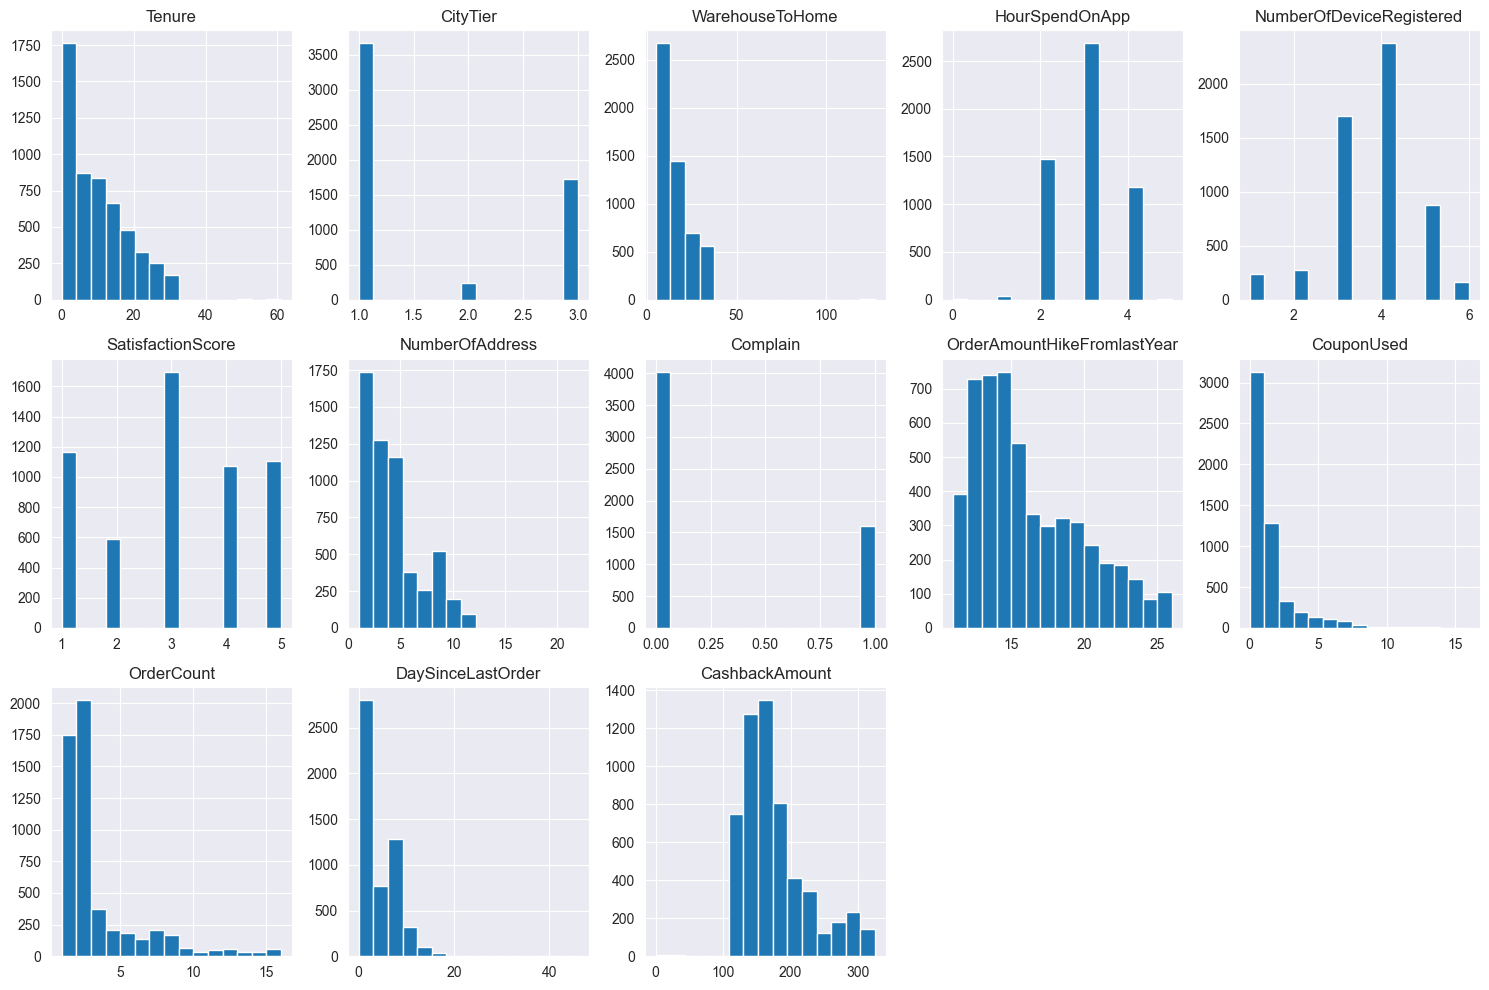

In [680]:
# a histogram grid plot of all of the variables

# Create a histogram grid
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.tight_layout()
plt.show()


/Users/jkerlin/PycharmProjects/zoominfo_churn/.venv/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_32922/233913120.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_32922/233913120.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/2v/5ynl9w294pd7vyqtmlmp694r0000gn/T/ipykernel_32922/233913120.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabe

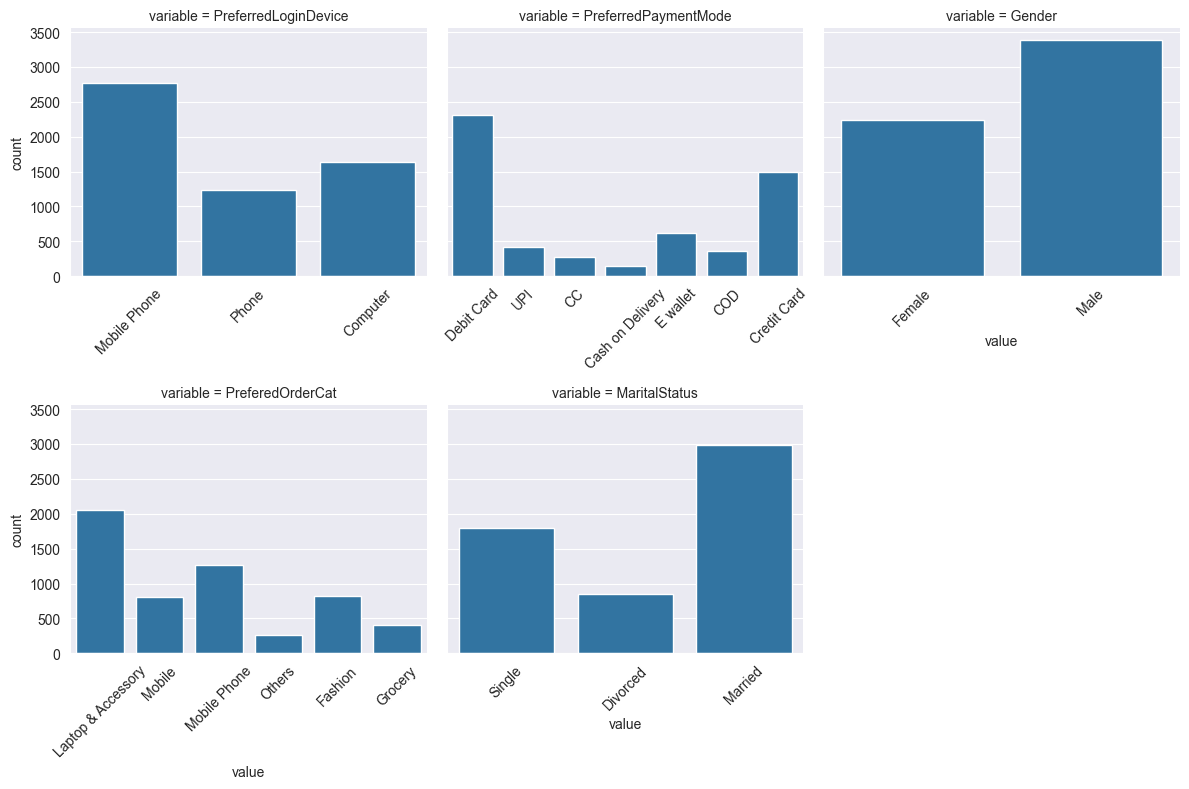

In [678]:
# count grid plot for all of the categorical variables
# List of columns to compare
dfp = df.drop(numerical_columns, axis=1)
dfp = dfp.drop('CustomerID', axis=1)

# Melt the DataFrame
dfp = dfp.melt(id_vars='Churn', var_name='variable', value_name='value')

# Filter out the groups with a count of 0
dfp = dfp.groupby(['variable', 'value']).filter(lambda x: len(x) > 0)

# Create a count grid 
g = sns.FacetGrid(dfp, col='variable', col_wrap=3, height=4, sharex=False)
g.map(sns.countplot, 'value')

# Fix the x-axis labels to tilt 45 degrees
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)   

plt.tight_layout()

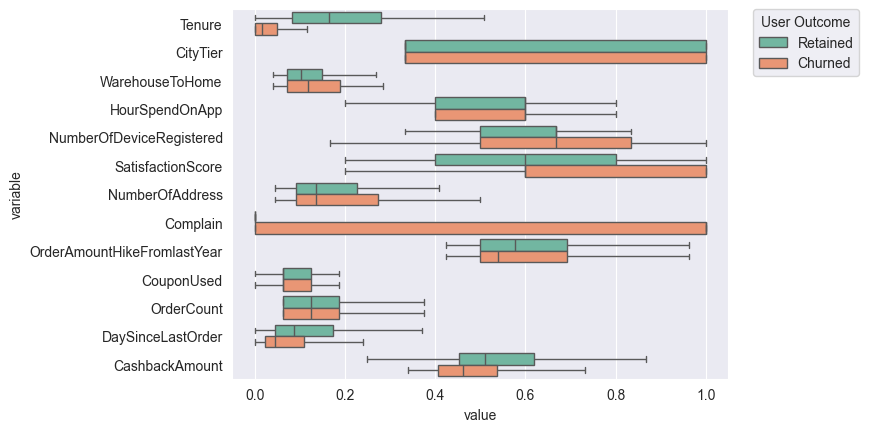

<Figure size 1000x800 with 0 Axes>

In [196]:
# Create a boxplot for each variable
ax = sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="Churn", showfliers=False)

# Relabel the legend and move it out of the way
# Set the figure size
plt.figure(figsize=(10, 8))

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Retained', 'Churned'], title='User Outcome', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

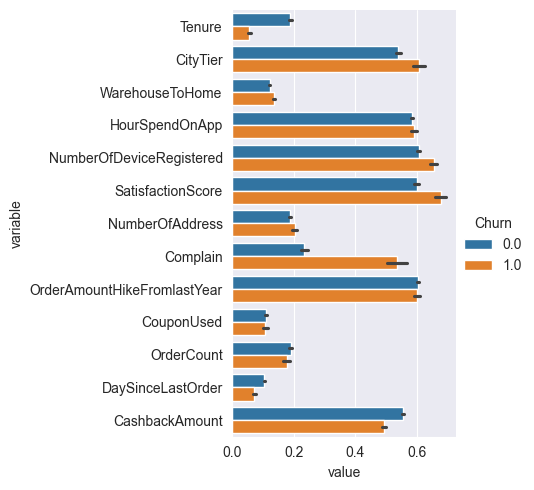

In [197]:
#Compare means
sns.catplot(x="value", y="variable", hue = "Churn", kind="bar", data=df_long)

In [198]:
#Odds of complaint given churn vs retain 
df.groupby("Churn").agg({"Complain": "mean"})

Complain
Churn          
0      0.234088
1      0.535865

In [199]:
#Odds of churn given Tenure (including nulls as -1
print(df.agg({"Churn": "mean"}))
df.fillna(-1).groupby("Tenure").agg({"Churn": "mean"})


Churn    0.168384
dtype: float64


Churn
Tenure          
-1.0    0.306818
 0.0    0.535433
 1.0    0.505797
 2.0    0.083832
 3.0    0.092308
 4.0    0.098522
 5.0    0.078431
 6.0    0.043716
 7.0    0.072398
 8.0    0.060837
 9.0    0.048583
 10.0   0.065728
 11.0   0.051546
 12.0   0.038462
 13.0   0.071823
 14.0   0.079545
 15.0   0.062893
 16.0   0.067114
 17.0   0.037736
 18.0   0.048780
 19.0   0.085714
 20.0   0.146789
 21.0   0.119048
 22.0   0.000000
 23.0   0.000000
 24.0   0.000000
 25.0   0.000000
 26.0   0.000000
 27.0   0.000000
 28.0   0.000000
 29.0   0.000000
 30.0   0.000000
 31.0   0.000000
 50.0   0.000000
 51.0   0.000000
 60.0   0.000000
 61.0   0.000000

A couple things pop out, with tenure being what's likely the strongest predictor of churn. Interesting inverse relationship with satisfaction score, unless lower is better for some reason. Complaints is predictive, but only 23% of customers complained in the last month, such that 47% of users that churn don't complain. Probably an interaction with tenure to look into.

Lets check the categorical variables first

In [200]:
print(df['PreferredLoginDevice'].value_counts())
df.groupby(['PreferredLoginDevice'])["Churn"].mean()

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredLoginDevice
Computer        0.198286
Mobile Phone    0.125859
Phone           0.224208
Name: Churn, dtype: float64

What is the difference between Phone and Mobile Phone? Are they actually calling to place an order? Regardless, looks like those logging in via mobile phone are more likely to churn. 

In [201]:
print(df['PreferredPaymentMode'].value_counts())
df.groupby(['PreferredPaymentMode'])["Churn"].mean()

PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


PreferredPaymentMode
CC                  0.216117
COD                 0.287671
Cash on Delivery    0.154362
Credit Card         0.128581
Debit Card          0.153846
E wallet            0.228013
UPI                 0.173913
Name: Churn, dtype: float64

Is CC credit card and COD cash on delivery? Looks like something is going on here, maybe it will show up in cross-tabs

In [202]:
print(df['Gender'].value_counts())
df.groupby(['Gender'])["Churn"].mean()

Gender
Male      3384
Female    2246
Name: count, dtype: int64


Gender
Female    0.154942
Male      0.177305
Name: Churn, dtype: float64

In [203]:
print(df['PreferedOrderCat'].value_counts())
df.groupby(['PreferedOrderCat'])["Churn"].mean()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


PreferedOrderCat
Fashion               0.154964
Grocery               0.048780
Laptop & Accessory    0.102439
Mobile                0.271941
Mobile Phone          0.275374
Others                0.075758
Name: Churn, dtype: float64

What is Mobile vs Mobile Phone? This is a weird mix of possible order types, so I'm not sure what kind of e-commerce company this is??? Ok, its a Kaggle data set with an unknown source.

In [204]:
print(df['PreferedOrderCat'].value_counts())
df.groupby(['PreferedOrderCat'])["Churn"].mean()

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


PreferedOrderCat
Fashion               0.154964
Grocery               0.048780
Laptop & Accessory    0.102439
Mobile                0.271941
Mobile Phone          0.275374
Others                0.075758
Name: Churn, dtype: float64

In [205]:
df_long

Churn        variable     value
0        1.0          Tenure  0.065574
1        1.0          Tenure       NaN
2        1.0          Tenure       NaN
3        1.0          Tenure  0.000000
4        1.0          Tenure  0.000000
...      ...             ...       ...
73185    0.0  CashbackAmount  0.463737
73186    0.0  CashbackAmount  0.692052
73187    0.0  CashbackAmount  0.573618
73188    0.0  CashbackAmount  0.550478
73189    0.0  CashbackAmount  0.520139

[73190 rows x 3 columns]

In [206]:
print(df['MaritalStatus'].value_counts())
df.groupby(['MaritalStatus'])["Churn"].mean()

MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


MaritalStatus
Divorced    0.146226
Married     0.115204
Single      0.267261
Name: Churn, dtype: float64

Ok, lets find some feature importances to get some sense of what's going on

In [207]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [481]:
grouped = df.groupby('PreferedOrderCat')['CashbackAmount']

mean = grouped.transform('mean')
std = grouped.transform('std')

df['NormalizedCashback'] = (df['CashbackAmount'] - mean) / std

In [641]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus', 'PreferedOrderCat'])
# Split the data into training and testing sets
X = df_dummies.drop(columns=['Churn', 'CustomerID']).fillna(df_dummies.mean())
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Train the model
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

feature_count = 10
top_features = feature_importances.index[:feature_count]
rf = RandomForestClassifier(n_estimators=100, max_depth=15, class_weight='balanced')
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train[top_features], y_train)
# Print the top 10 most important features
print(feature_importances)

# Make predictions
y_pred = rf.predict(X_test[top_features])

#Accuracy of the model
print(classification_report(y_test, y_pred))



                                       importance
Tenure                                   0.224077
CashbackAmount                           0.091933
Complain                                 0.072657
WarehouseToHome                          0.062610
DaySinceLastOrder                        0.059337
NumberOfAddress                          0.051034
OrderAmountHikeFromlastYear              0.048862
SatisfactionScore                        0.046135
NumberOfDeviceRegistered                 0.031123
OrderCount                               0.028015
MaritalStatus_Single                     0.027543
CouponUsed                               0.025727
CityTier                                 0.023145
MaritalStatus_Married                    0.017590
HourSpendOnApp                           0.017469
PreferedOrderCat_Laptop & Accessory      0.017152
PreferedOrderCat_Mobile Phone            0.013634
PreferredPaymentMode_Credit Card         0.012896
PreferredPaymentMode_Debit Card          0.012734


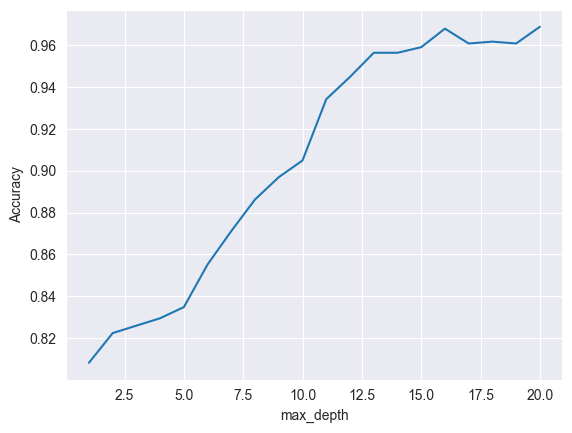

In [631]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus', 'PreferedOrderCat'])
# Split the data into training and testing sets
X = df_dummies.drop(columns=['Churn', 'CustomerID']).fillna(df_dummies.mean())
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Define the range of max_depth values
max_depth_range = list(range(1, 21))
feature_counts = [10]
# List to store the average accuracies for each value of max_depth
accuracies = []

# Iterate over the max_depth values
for max_depth in max_depth_range:
    # Train the model
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, class_weight='balanced')
    rf.fit(X_train, y_train)

    feature_count = 10
    top_features = feature_importances.index[:feature_count]
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, class_weight='balanced')
    #rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train[top_features], y_train)
    # Make predictions
    y_pred = rf.predict(X_test[top_features])
    # Compute the accuracy and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot max_depth values vs accuracies
plt.plot(max_depth_range, accuracies)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [665]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced')

# Define the scoring metric as macro average of f1 score
scorer = make_scorer(f1_score, average='macro')

# Initialize GridSearchCV with the model, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
rf_best = RandomForestClassifier(**best_params, class_weight='balanced')
rf_best.fit(X_train, y_train)

# Make predictions
y_pred = rf_best.predict(X_test)

# Compute the macro average of f1 score
macro_avg = f1_score(y_test, y_pred, average='macro')

print(f"Macro Average F1 Score: {macro_avg}")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Macro Average F1 Score: 0.9554923119490889


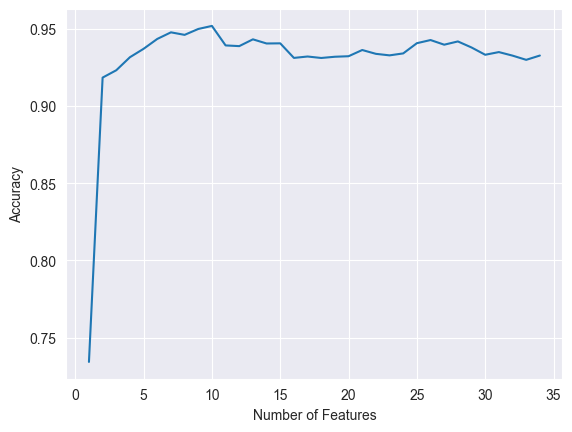

In [663]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus', 'PreferedOrderCat'])
# Split the data into training and testing sets
X = df_dummies.drop(columns=['Churn', 'CustomerID']).fillna(df_dummies.mean())
y = df_dummies['Churn']

#Run each random seed 10 times and average the results
seed_accuracies = np.zeros((10, len(feature_counts)))
seed_macro_avg_accuracies = np.zeros((10, len(feature_counts)))

# Define the range of feature counts
feature_counts = list(range(1, len(X.columns) + 1))

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Train the model to get feature importances
    rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
    rf.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
    

    
    # List to store the average accuracies for each feature count
    accuracies = []
    macro_avg_accuracies = []

    # Iterate over the feature counts
    for feature_count in feature_counts:
        # Select the top features
        top_features = feature_importances.index[:feature_count]
        X_train_top = X_train[top_features]
        X_test_top = X_test[top_features]
    
        # Train the model
        rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
        rf.fit(X_train_top, y_train)
    
        # Make predictions
        y_pred = rf.predict(X_test_top)
    
        # Compute the accuracy and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        macro_avg = f1_score(y_test, y_pred, average='macro')
        accuracies.append(accuracy)
        macro_avg_accuracies.append(macro_avg)
    
    seed_accuracies[seed,:] = accuracies
    seed_macro_avg_accuracies[seed,:] = macro_avg_accuracies
mean_acc = np.mean(seed_accuracies, axis = 0)
mean_macro_avg = np.mean(seed_macro_avg_accuracies, axis = 0)
# Plot feature counts vs accuracies
plt.plot(feature_counts, mean_macro_avg)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

In [669]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Assuming X and y are your features and target
X = df_dummies.drop(columns=['Churn', 'CustomerID']).fillna(df_dummies.mean())
y = df_dummies['Churn']

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(class_weight='balanced')

# Initialize RFE
rfe = RFE(estimator=rf, step=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_features_to_select': list(range(1, len(X.columns)+1)),
    'estimator__n_estimators': [100]
}

# Define the scoring metric as macro average of f1 score
scorer = make_scorer(f1_score, average='macro')

# Initialize GridSearchCV with the RFE, parameter grid, and scoring metric
grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, scoring=scorer, cv=StratifiedKFold(10), verbose=2, n_jobs=-1)

# Fit the data to the GridSearchCV object
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best number of features
print(f"Best number of features: {best_params['n_features_to_select']}")

# Get the best hyperparameters for the RandomForestClassifier
print(f"Best hyperparameters for the RandomForestClassifier: {best_params}")

Fitting 10 folds for each of 34 candidates, totalling 340 fits
Best number of features: 10
Best hyperparameters for the RandomForestClassifier: {'estimator__n_estimators': 100, 'n_features_to_select': 10}


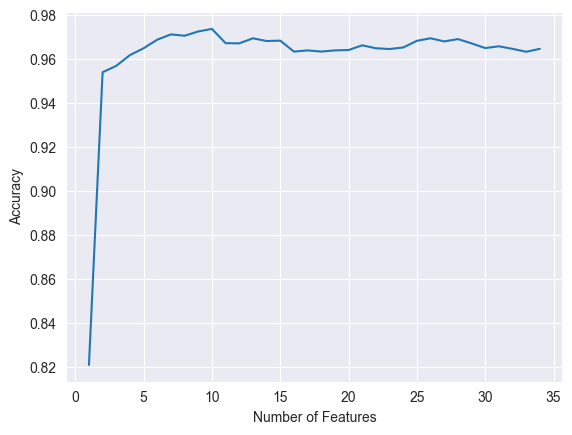

In [664]:
plt.plot(feature_counts, mean_acc)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

In [617]:
feature_counts

NameError: name 'feature_counts' is not defined

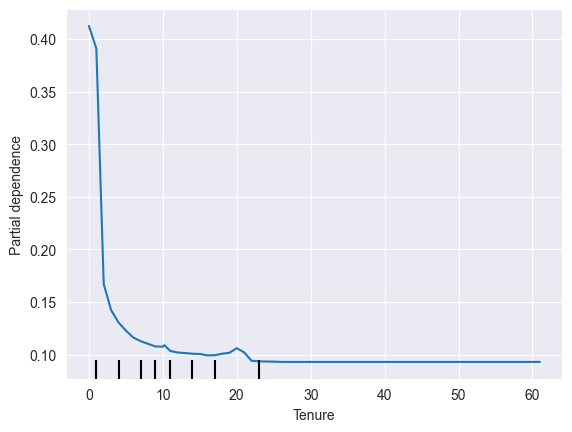

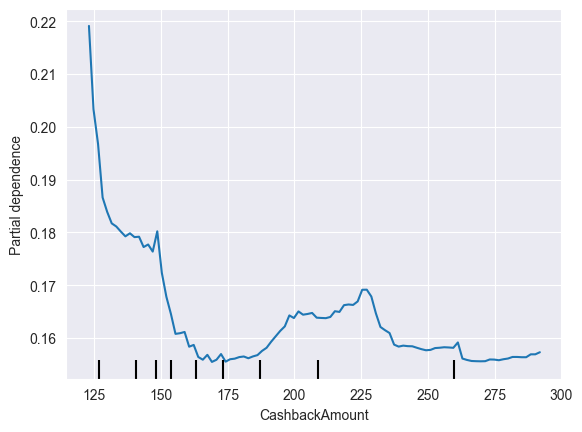

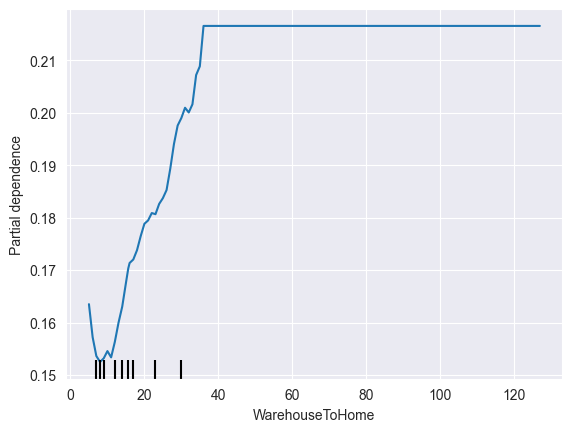

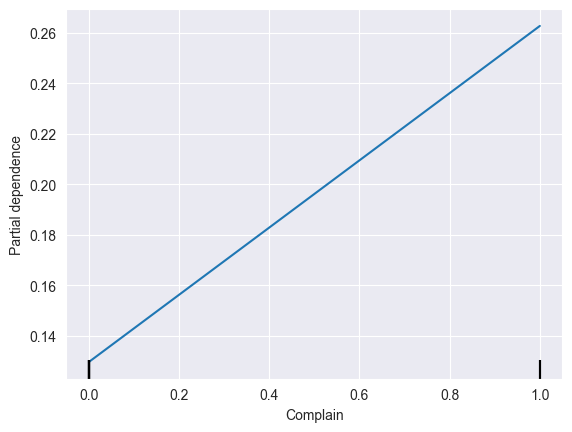

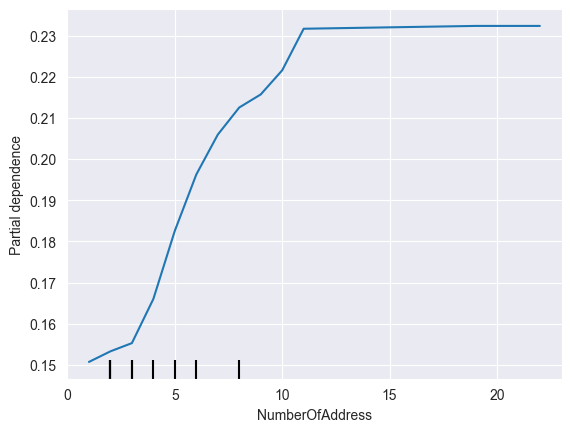

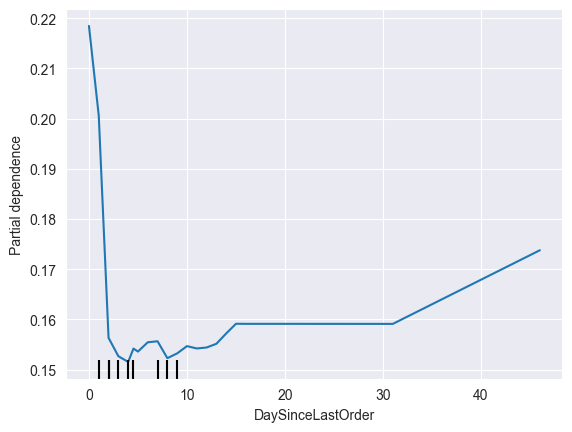

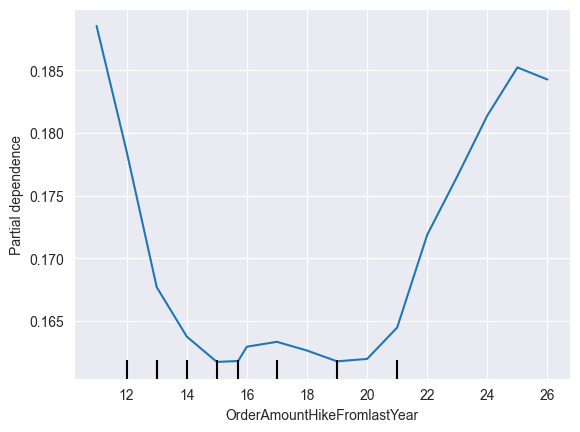

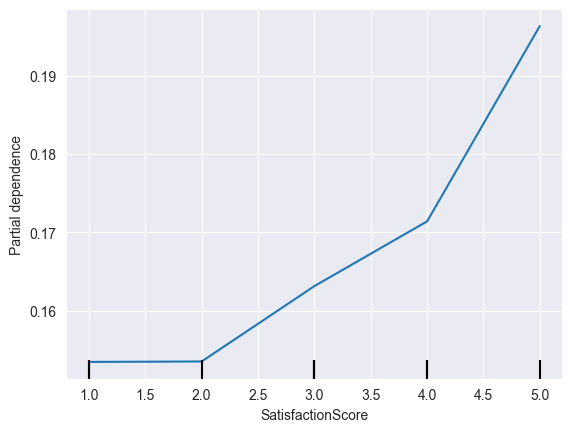

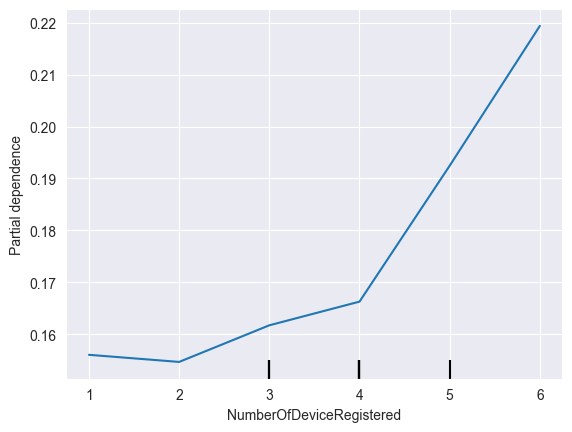

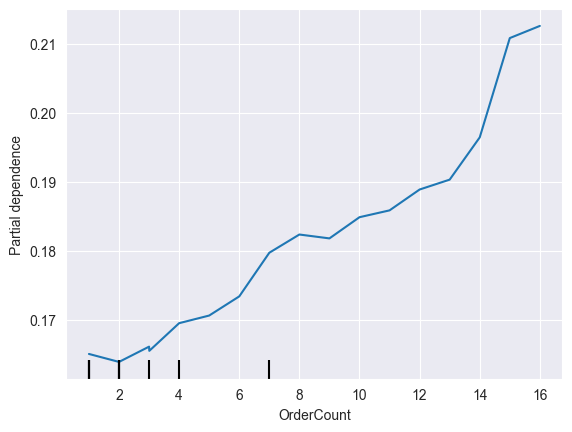

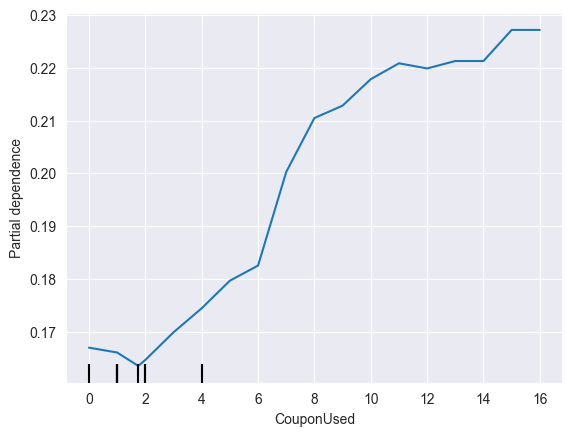

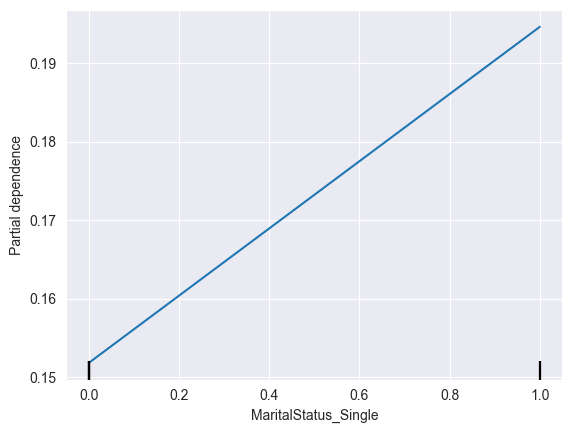

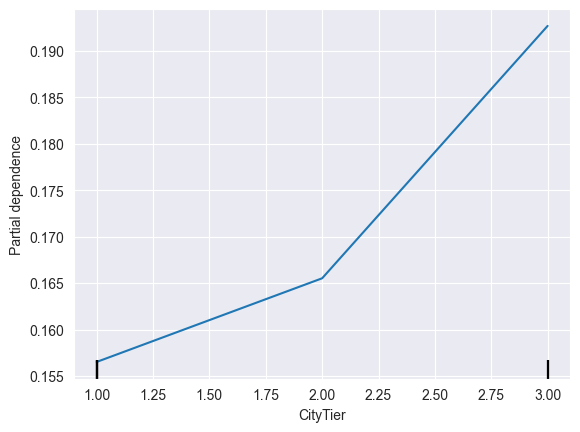

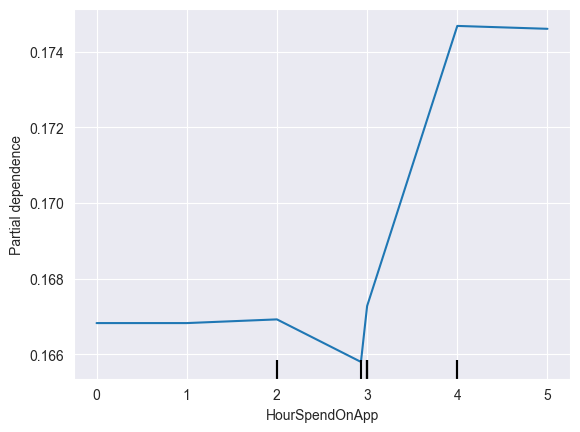

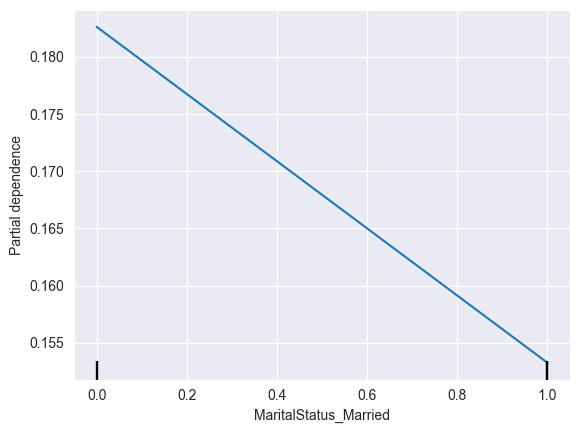

In [554]:
from sklearn.inspection import PartialDependenceDisplay
for col in feature_importances.index[:15]:
    PartialDependenceDisplay.from_estimator(rf, X,[col])

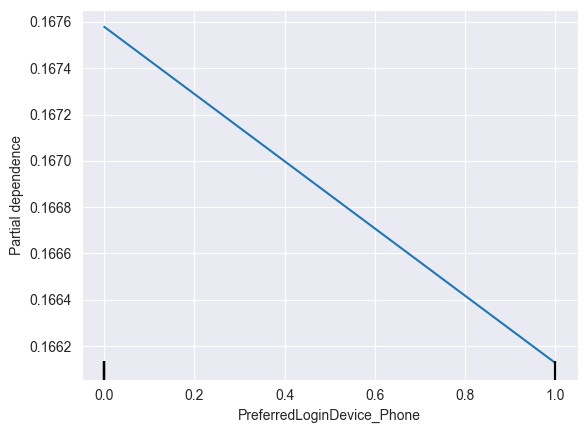

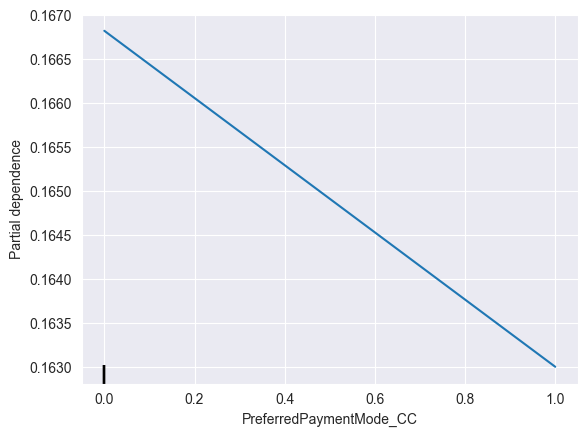

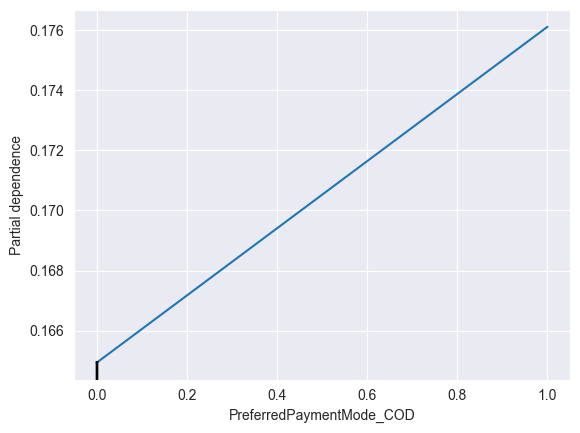

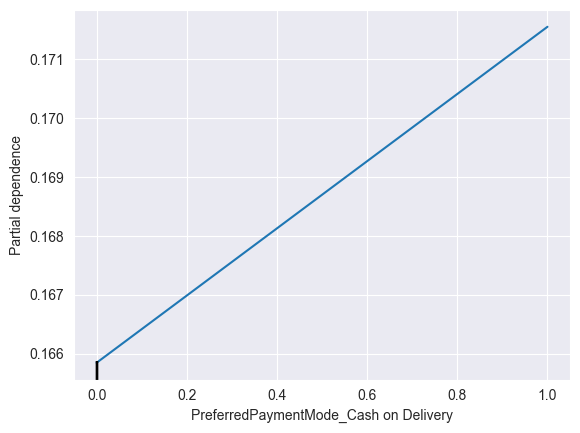

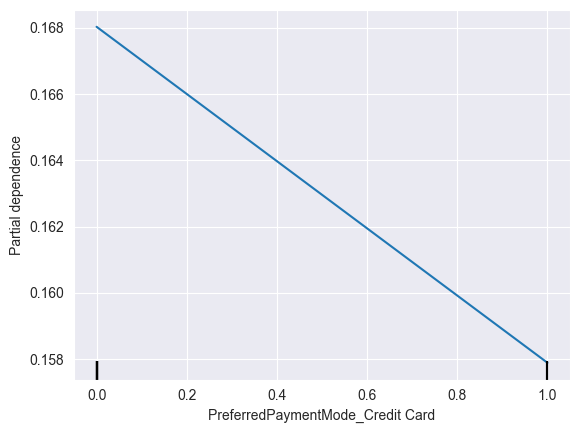

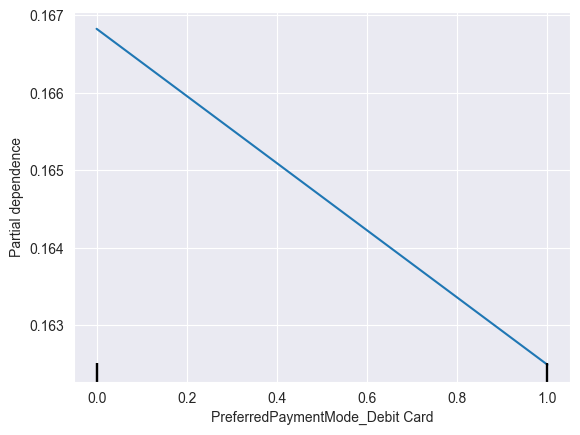

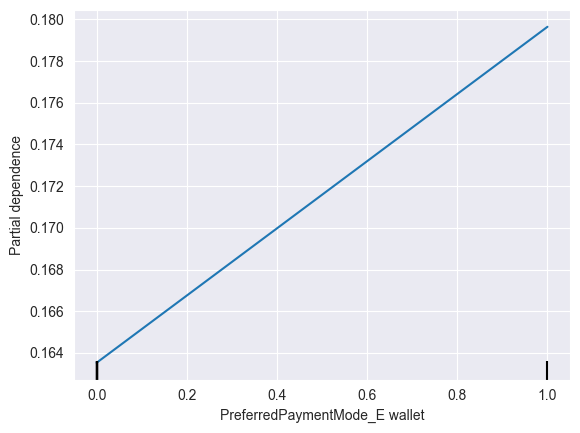

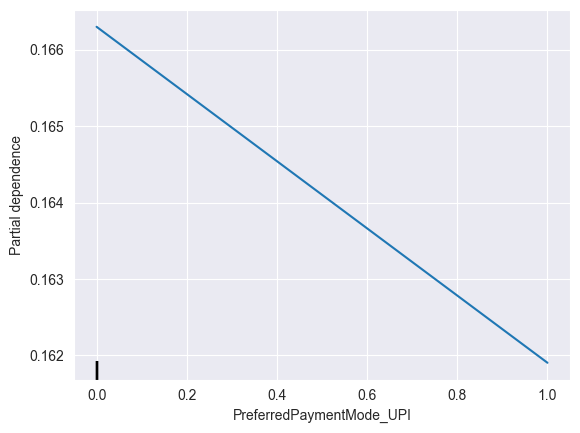

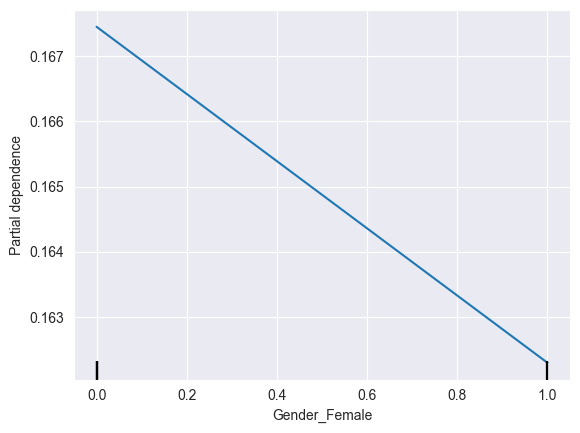

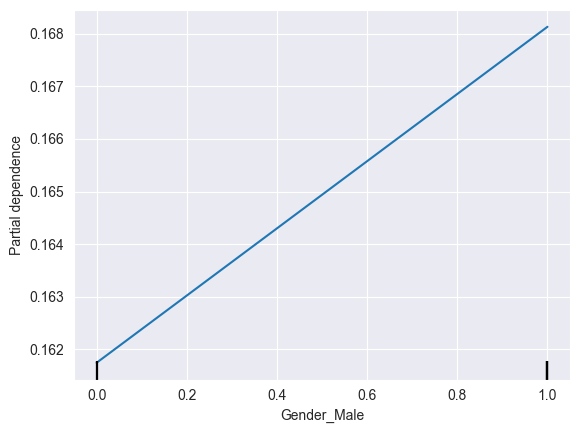

In [533]:
from sklearn.inspection import PartialDependenceDisplay
for col in X.columns[15:25]:
    PartialDependenceDisplay.from_estimator(rf, X,[col])

In [510]:
import sklearn
print(sklearn.__version__)

1.4.2


In [5]:
# Get the predicted probabilities of the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Set the threshold to a lower value (e.g., 0.3)
threshold = 0.3

# Apply the threshold to the probabilities to get the final predictions
y_pred = (y_pred_proba >= threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))


NameError: name 'rf' is not defined

In [657]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97       929\n           1       0.95      0.80      0.87       197\n\n    accuracy                           0.96      1126\n   macro avg       0.95      0.89      0.92      1126\nweighted avg       0.96      0.96      0.96      1126\n'

In [575]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Convert categorical variables to dummies
df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus', 'PreferedOrderCat'])
# Split the data into training and testing sets
X = df_dummies.drop(columns=['Churn', 'CustomerID']).fillna(df_dummies.mean())
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

# Train the model
dt = DecisionTreeClassifier(max_depth=4,min_samples_split=5)

dt.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(dt.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the top 10 most important features
print(feature_importances)

# # Make predictions
# y_pred = dt.predict(X_test)
# 
# # Accuracy of the model
# print(classification_report(y_test, y_pred))

                                       importance
Tenure                                   0.587291
Complain                                 0.155536
NumberOfAddress                          0.097537
CashbackAmount                           0.048013
DaySinceLastOrder                        0.045404
NumberOfDeviceRegistered                 0.024906
SatisfactionScore                        0.017645
HourSpendOnApp                           0.016979
OrderCount                               0.004025
OrderAmountHikeFromlastYear              0.002664
PreferedOrderCat_Mobile                  0.000000
PreferredPaymentMode_UPI                 0.000000
PreferedOrderCat_Mobile Phone            0.000000
PreferedOrderCat_Laptop & Accessory      0.000000
PreferedOrderCat_Grocery                 0.000000
PreferedOrderCat_Fashion                 0.000000
MaritalStatus_Single                     0.000000
MaritalStatus_Married                    0.000000
MaritalStatus_Divorced                   0.000000


In [573]:
# Get the predicted probabilities of the positive class
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Set the threshold to a lower value (e.g., 0.3)
threshold = 0.2

# Apply the threshold to the probabilities to get the final predictions
y_pred = (y_pred_proba >= threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.83      0.88       942
           1       0.46      0.76      0.57       184

    accuracy                           0.81      1126
   macro avg       0.70      0.79      0.73      1126
weighted avg       0.87      0.81      0.83      1126



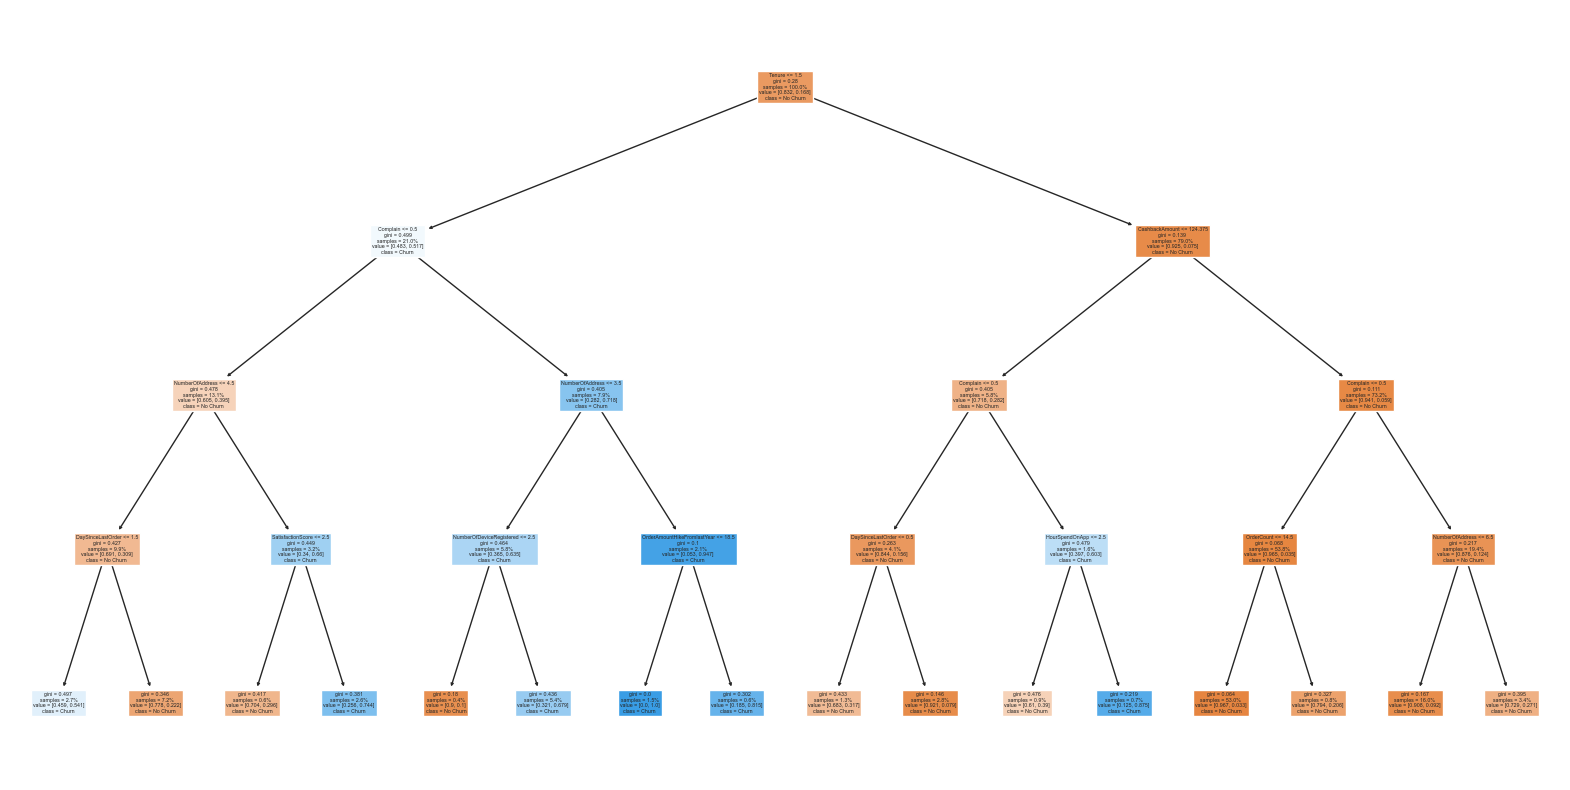

In [576]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming `dt` is your trained Decision Tree model
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], proportion=True)
plt.show()

In [475]:
X_train

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
5350     6.0         1         9.000000        3.000000   
2512     0.0         3        21.000000        2.000000   
5567     1.0         1         8.000000        3.000000   
304     19.0         1         8.000000        2.000000   
3909     3.0         1        16.000000        3.000000   
...      ...       ...              ...             ...   
57       4.0         3        26.000000        2.931535   
3273     8.0         3        15.000000        4.000000   
2706     0.0         1        15.639896        3.000000   
578     11.0         3        16.000000        2.000000   
2439    13.0         3        15.000000        2.000000   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
5350                         4                  4                2         0   
2512                         5                  1                7         1   
5567                         5                  3                3         0   
304                          3                  3                7         0   
3909                         4                  3               11         0   
...                        ...                ...              ...       ...   
57                           3                  4                2         1   
3273                         4                  5                7         0   
2706                         1                  1                1         0   
578                          3                  2                2         1   
2439                         3                  5                1         0   

      OrderAmountHikeFromlastYear  CouponUsed  ...  Gender_Male  \
5350                         14.0    2.000000  ...         True   
2512                         14.0    0.000000  ...         True   
5567                         13.0    2.000000  ...         True   
304                          13.0    1.751023  ...         True   
3909                         18.0    2.000000  ...        False   
...                           ...         ...  ...          ...   
57                           22.0    0.000000  ...        False   
3273                         18.0    2.000000  ...        False   
2706                         18.0    2.000000  ...         True   
578                          13.0    0.000000  ...        False   
2439                         12.0    7.000000  ...         True   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
5350                   False                   True                 False   
2512                   False                   True                 False   
5567                   False                  False                  True   
304                     True                  False                 False   
3909                   False                   True                 False   
...                      ...                    ...                   ...   
57                     False                  False                  True   
3273                    True                  False                 False   
2706                   False                   True                 False   
578                    False                  False                  True   
2439                   False                   True                 False   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
5350                     False                     False   
2512                     False                     False   
5567                     False                     False   
304                      False                      True   
3909                     False                     False   
...                        ...                       ...   
57                       False                     False   
3273                     False                     False   
2706                     False                     False   
578   

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Get coefficients
coefficients = pd.DataFrame(lr.coef_[0], index = X.columns, columns=['coefficients']).sort_values('coefficients', ascending=False)


print(coefficients)

# Make predictions
y_pred = lr.predict(X_test)

# Accuracy of the model
print(classification_report(y_test, y_pred))

                                       coefficients
Complain                                   1.830995
PreferedOrderCat_Mobile                    0.958191
NumberOfDeviceRegistered                   0.417698
CityTier                                   0.329184
SatisfactionScore                          0.275031
NumberOfAddress                            0.236963
PreferredPaymentMode_E wallet              0.198810
PreferedOrderCat_Others                    0.184623
PreferredPaymentMode_COD                   0.105525
MaritalStatus_Single                       0.099269
OrderCount                                 0.098878
CouponUsed                                 0.068094
WarehouseToHome                            0.039966
CashbackAmount                             0.003577
PreferredPaymentMode_Cash on Delivery      0.001432
HourSpendOnApp                            -0.013878
OrderAmountHikeFromlastYear               -0.030930
PreferedOrderCat_Mobile Phone             -0.098315
DaySinceLast

/Users/jkerlin/PycharmProjects/zoominfo_churn/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [352]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Get coefficients
coefficients = pd.DataFrame(lr.coef_[0], index=X.columns, columns=['coefficients']).sort_values('coefficients',
                                                                                                ascending=False)

print(coefficients)

# Make predictions
y_pred = lr.predict(X_test)

# Accuracy of the model
print(classification_report(y_test, y_pred))

                                       coefficients
Complain                                   1.831142
MaritalStatus_Single                       0.531912
PreferedOrderCat_Fashion                   0.420092
NumberOfDeviceRegistered                   0.289239
PreferredPaymentMode_E wallet              0.286985
SatisfactionScore                          0.265211
CityTier                                   0.251657
PreferedOrderCat_Others                    0.231626
NumberOfAddress                            0.231444
PreferredLoginDevice_Computer              0.204424
PreferredPaymentMode_Cash on Delivery      0.126168
PreferedOrderCat_Grocery                   0.111479
PreferedOrderCat_Mobile                    0.105072
OrderCount                                 0.096660
CouponUsed                                 0.092776
PreferredPaymentMode_COD                   0.088647
WarehouseToHome                            0.035178
Gender_Male                                0.018846
CashbackAmou

/Users/jkerlin/PycharmProjects/zoominfo_churn/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [349]:
lr.coef_

array([-0.01431688,  0.03282215,  0.00333596, -0.00491155,  0.03659253,
        0.02727573,  0.02120381,  0.21074566, -0.00157651,  0.00547739,
        0.0054523 , -0.00761817, -0.00153126,  0.02630311, -0.00911997,
       -0.01718313, -0.07394963,  0.0494007 ,  0.03477809, -0.01973864,
       -0.00918637,  0.03582383, -0.01712797, -0.01745529,  0.01745529,
       -0.02398257, -0.04633252,  0.0703151 , -0.01412609,  0.09634363,
       -0.16188656, -0.03131349, -0.07321988,  0.18420239])

In [479]:
df['NormalizedCashback']

0      -0.353773
1      -1.296071
2      -1.446184
3      -1.608994
4       0.810347
          ...   
5625   -0.801303
5626    0.656877
5627    0.932029
5628    0.567015
5629    0.088419
Name: NormalizedCashback, Length: 5630, dtype: float64

Interesting that cashback amount and warehouse to home are near the top...

In [480]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

top_10 = feature_importances.head(10).index

df_dummies = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus', 'PreferedOrderCat'])
# Split the data into training and testing sets
X = df_dummies[top_10].fillna(df_dummies.mean())
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Train the model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances_round2 = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the top 10 most important features
print(feature_importances_round2)

# Make predictions
y_pred = rf.predict(X_test)

#Accuracy of the model
print(classification_report(y_test, y_pred))

                             importance
Tenure                         0.258176
CashbackAmount                 0.164115
WarehouseToHome                0.099671
NumberOfAddress                0.089645
DaySinceLastOrder              0.087382
OrderAmountHikeFromlastYear    0.082895
Complain                       0.067593
SatisfactionScore              0.054997
NumberOfDeviceRegistered       0.047915
OrderCount                     0.047611
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       933
           1       0.95      0.88      0.91       193

    accuracy                           0.97      1126
   macro avg       0.96      0.93      0.95      1126
weighted avg       0.97      0.97      0.97      1126



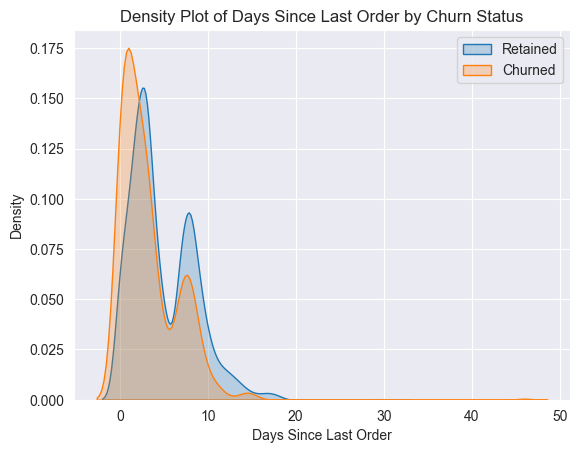

In [653]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate density plots for 'DaySinceLastOrder' for each category of 'Churn'
sns.kdeplot(data=df[df['Churn'] == 0]['DaySinceLastOrder'], label='Retained', fill=True)
sns.kdeplot(data=df[df['Churn'] == 1]['DaySinceLastOrder'], label='Churned', fill=True)

# Add labels and title
plt.xlabel('Days Since Last Order')
plt.ylabel('Density')
plt.title('Density Plot of Days Since Last Order by Churn Status')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [548]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

select_features = ['MaritalStatus','PreferedOrderCat','PreferredPaymentMode','PreferredLoginDevice','Gender'] 

df_dummies = pd.get_dummies(df[['Churn']+ select_features], columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender','MaritalStatus', 'PreferedOrderCat'])
# Split the data into training and testing sets
X = df_dummies.drop(columns = 'Churn').fillna(df_dummies.mean())
y = df_dummies['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Train the model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances_round2 = pd.DataFrame(rf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the select_features
print(feature_importances_round2)

# Make predictions
y_pred = rf.predict(X_test)

#Accuracy of the model
print(classification_report(y_test, y_pred))

                                       importance
MaritalStatus_Single                     0.098310
PreferedOrderCat_Mobile Phone            0.070701
PreferredPaymentMode_E wallet            0.066078
PreferredPaymentMode_Debit Card          0.058965
MaritalStatus_Married                    0.058790
PreferedOrderCat_Laptop & Accessory      0.058515
Gender_Female                            0.053426
PreferredPaymentMode_Credit Card         0.051376
Gender_Male                              0.051078
PreferredLoginDevice_Computer            0.050580
PreferredLoginDevice_Mobile Phone        0.048264
PreferredPaymentMode_UPI                 0.044316
PreferedOrderCat_Mobile                  0.042533
PreferredPaymentMode_COD                 0.041272
PreferredLoginDevice_Phone               0.039141
PreferedOrderCat_Fashion                 0.037648
MaritalStatus_Divorced                   0.033502
PreferedOrderCat_Grocery                 0.028956
PreferredPaymentMode_Cash on Delivery    0.024729


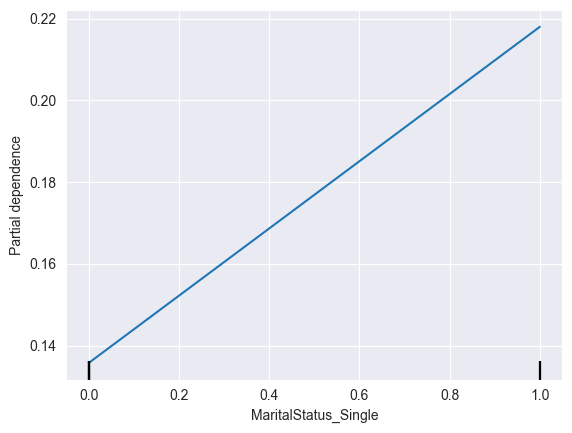

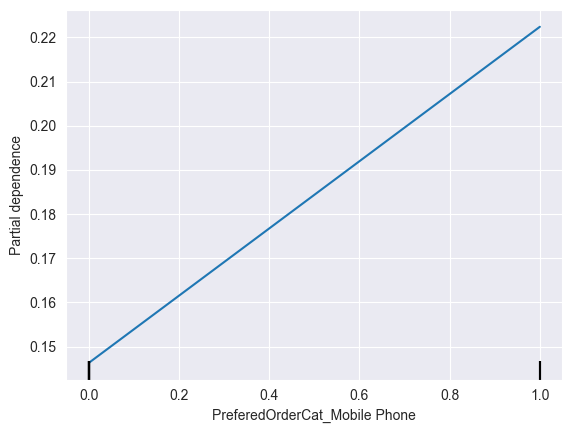

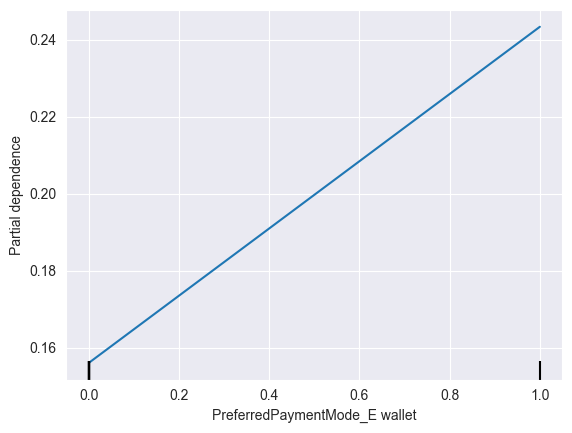

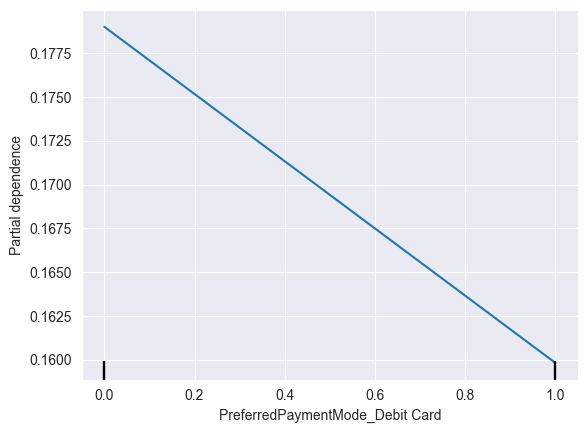

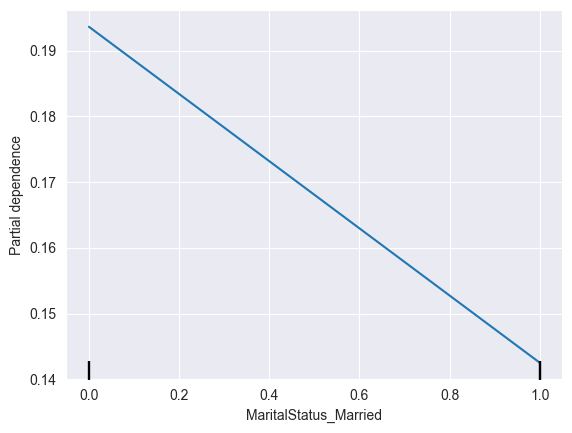

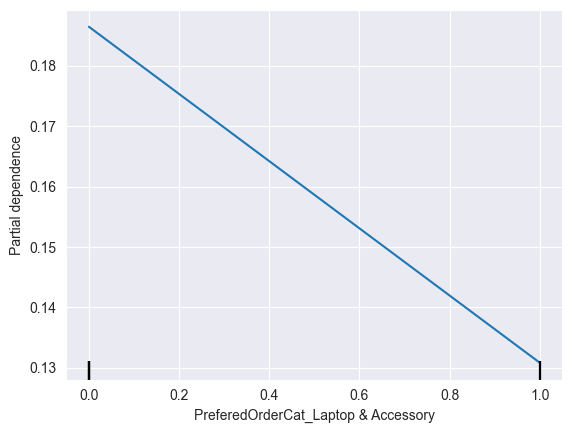

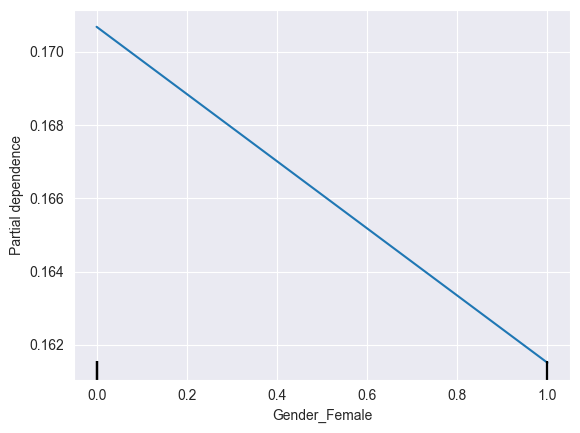

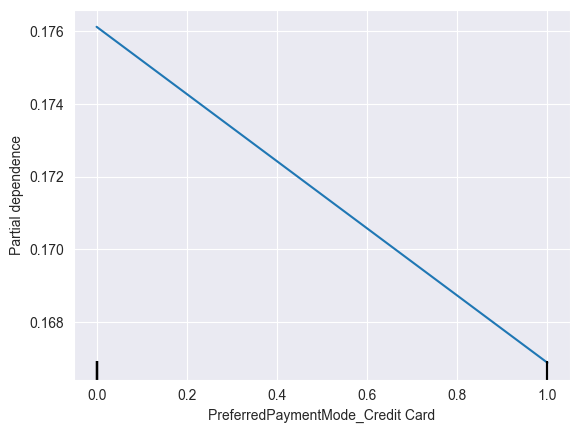

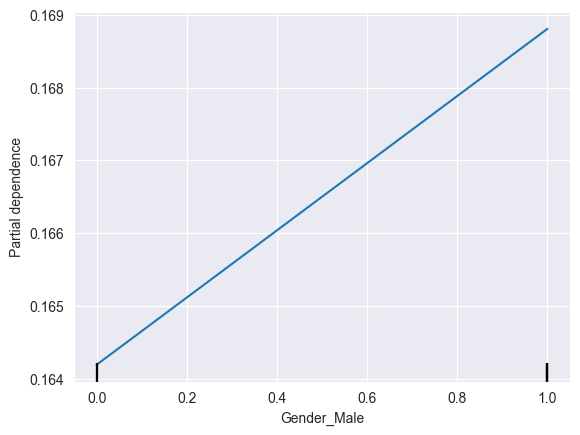

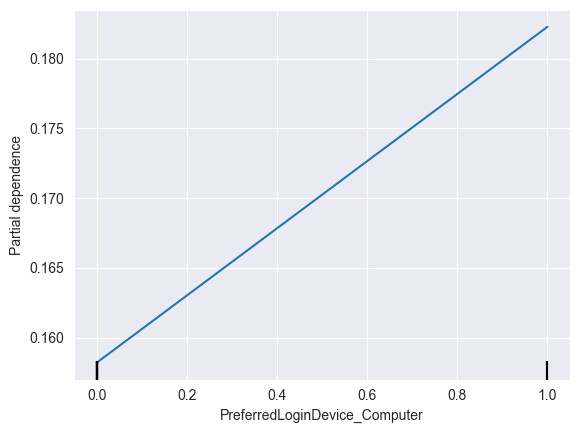

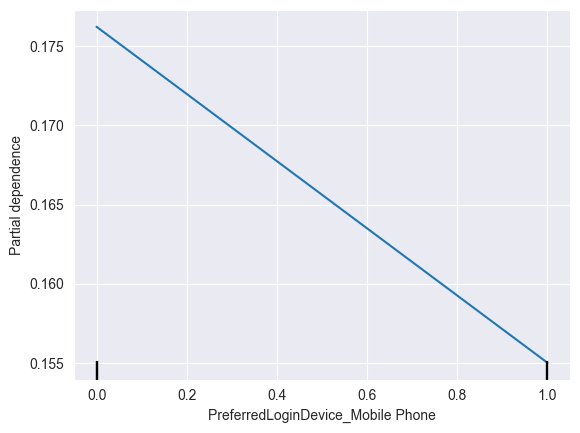

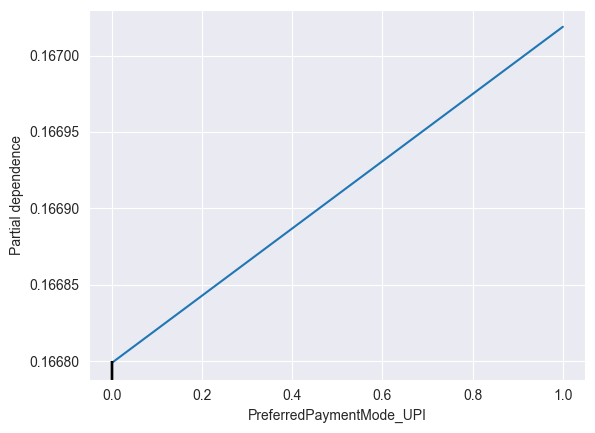

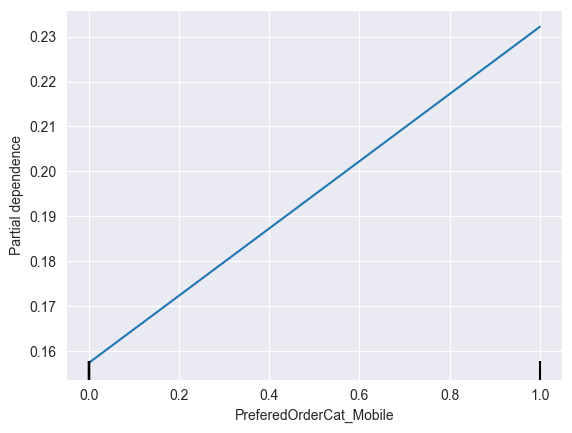

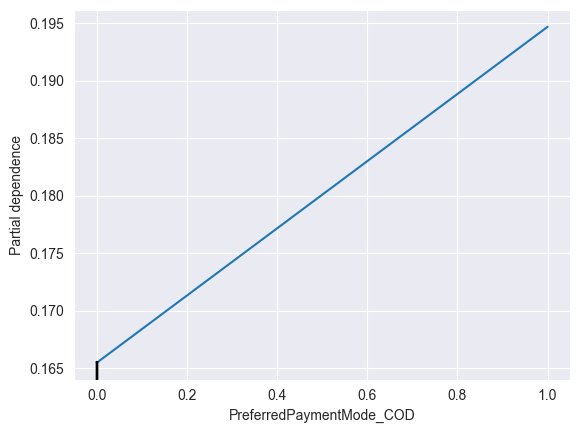

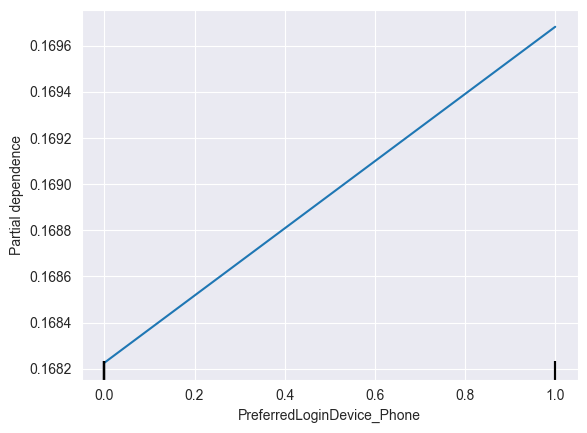

In [552]:
from sklearn.inspection import PartialDependenceDisplay
for col in feature_importances_round2.index[:15]:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features + ['Churn']].corr(), annot=False, cmap='RdYlGn', center=0)
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x1000 with 0 Axes>

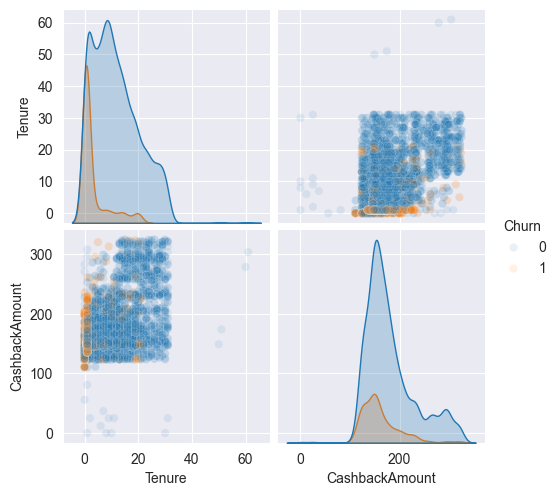

In [210]:
# Create a scatter plot grid for the top 3 features
sns.pairplot(df_dummies[['Churn'] + list(top_10[:2])], hue='Churn', plot_kws={'alpha': 0.1})


In [211]:
#Cashback amount is not normal
#Find the 3rd percentile of CashbackAmount
cashback_1st_percentile = df_dummies['CashbackAmount'].quantile(0.003)

print(cashback_1st_percentile)

#$110 dollar cutoff?

110.52000000000001


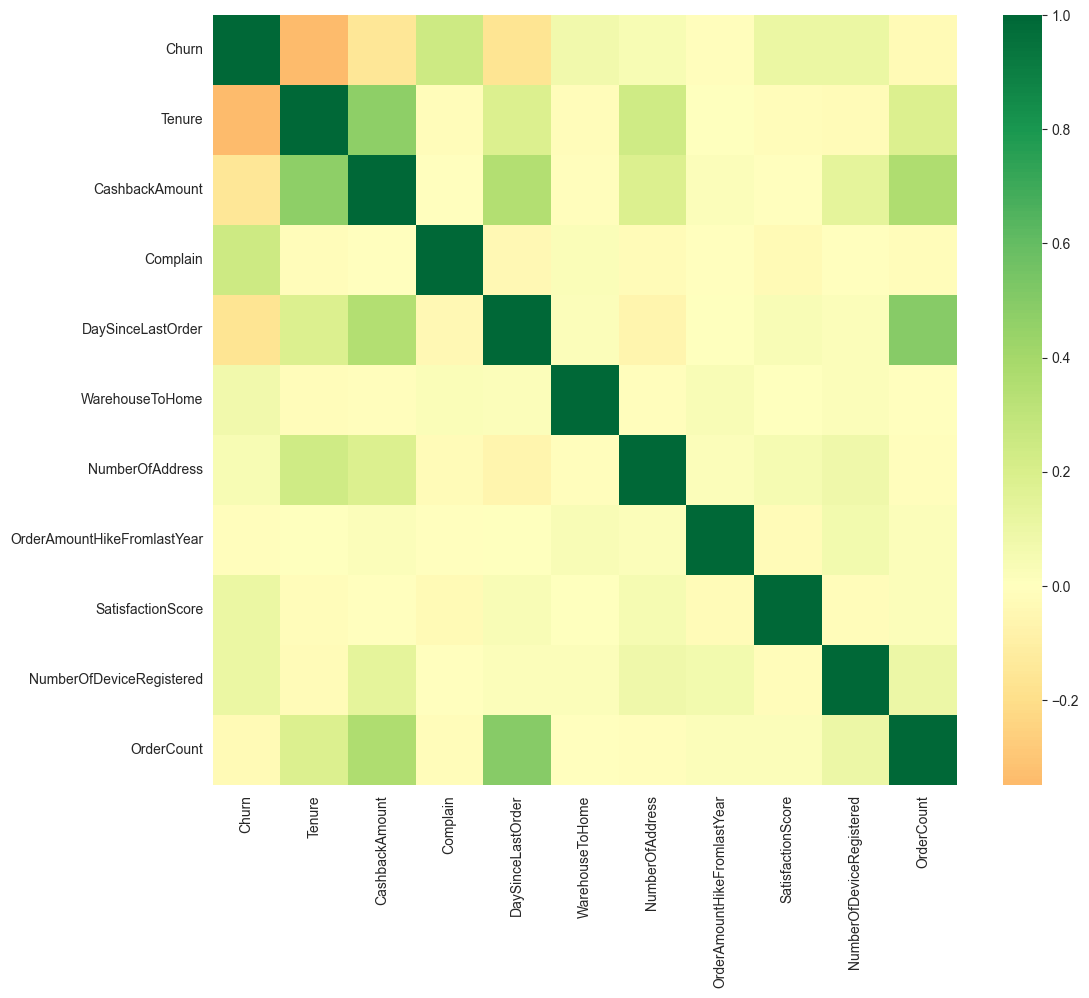

In [486]:
#plot correlation matrix of df_dummies

plt.figure(figsize=(12, 10))
sns.heatmap(df_dummies[['Churn']  + list(top_10)].corr(), annot=False, cmap='RdYlGn', center=0)
plt.show()



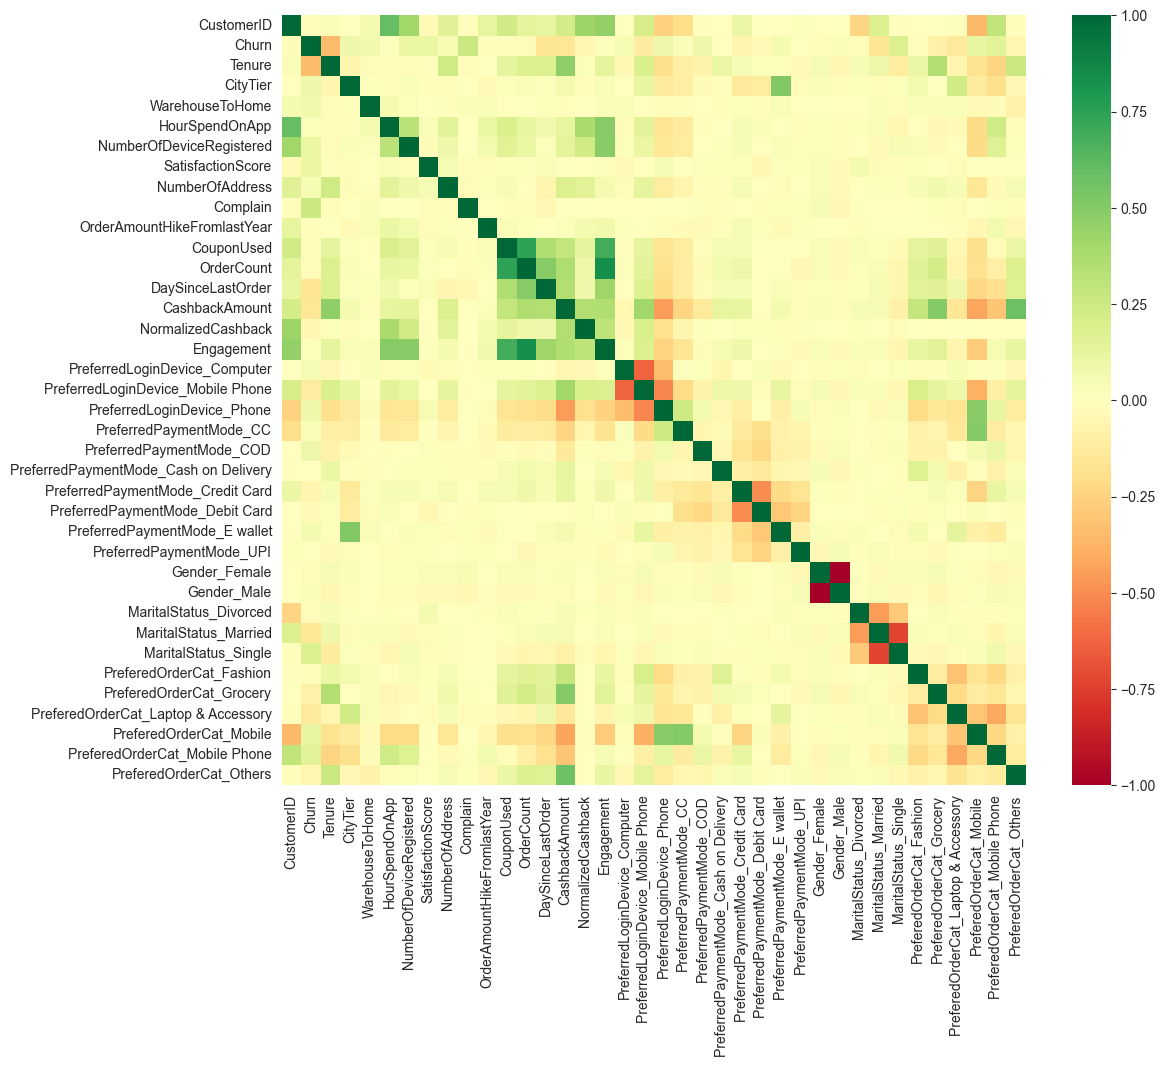

In [502]:
#plot correlation matrix of df_dummies

plt.figure(figsize=(12, 10))
sns.heatmap(df_dummies.corr(), annot=False, cmap='RdYlGn', center=0)
plt.show()

In [485]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='RdYlGn', center=0)
plt.show()

ValueError: could not convert string to float: 'Mobile Phone'

<Figure size 1200x1000 with 0 Axes>

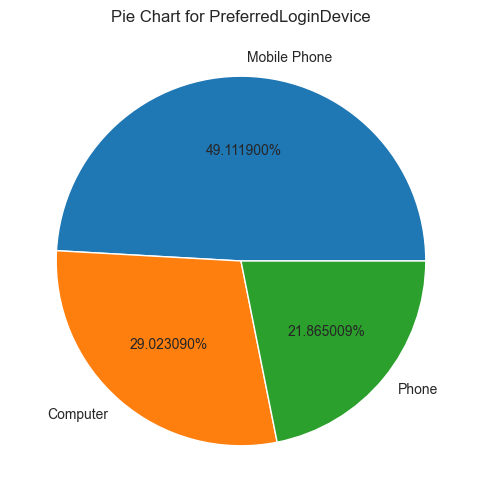

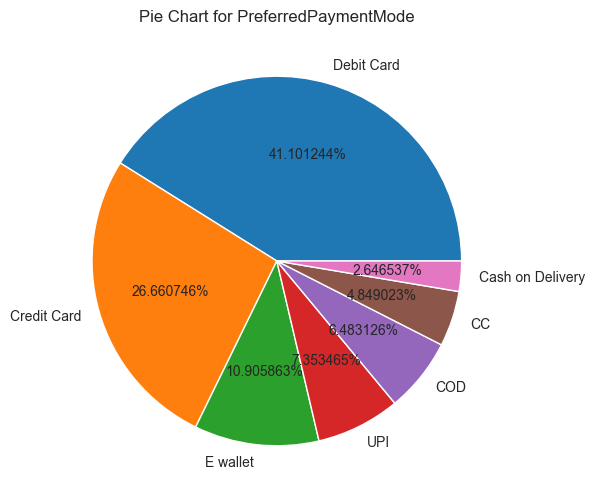

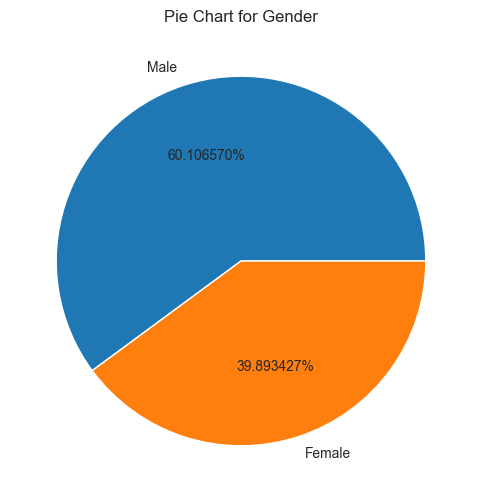

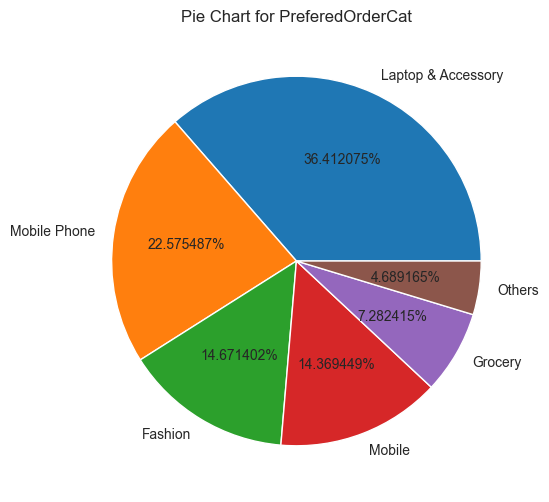

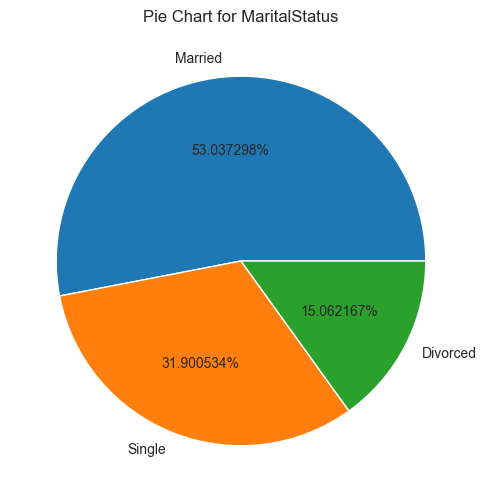

In [693]:
# Assuming `df` is your DataFrame

color_dict = {'Mobile Phone': 'red', 'Computer': 'blue', 'Phone': 'green'}


for col in df.columns:
    if df[col].dtype == 'object':
        # Calculate the percentages
        percentages = df[col].value_counts(normalize=True) * 100
        #colors1 = [color_dict[label] for label in percentages.index]
        # Create a pie chart
        plt.figure(figsize=(6, 6))
        plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
        plt.title(f'Pie Chart for {col}')
        plt.show()

In [695]:


# Get unique values from col
unique_values = dft[col].unique()

# Generate a list of unique colors
colors = plt.cm.get_cmap('tab10', len(unique_values))

# Create a dictionary mapping each unique value to a unique color
color_dict = {value: colors(i) for i, value in enumerate(unique_values)}


array(['Single', 'Divorced', 'Married'], dtype=object)


Column: PreferredLoginDevice


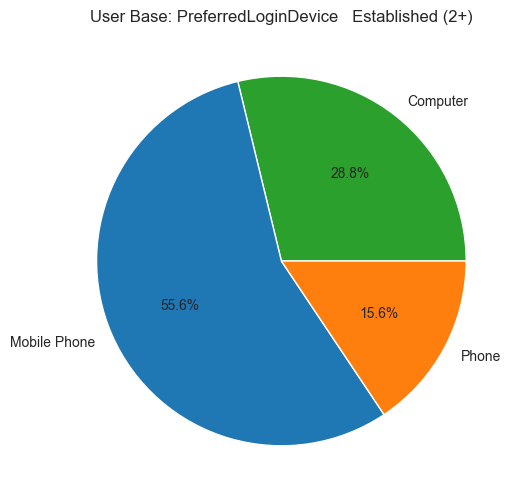


Column: PreferredLoginDevice


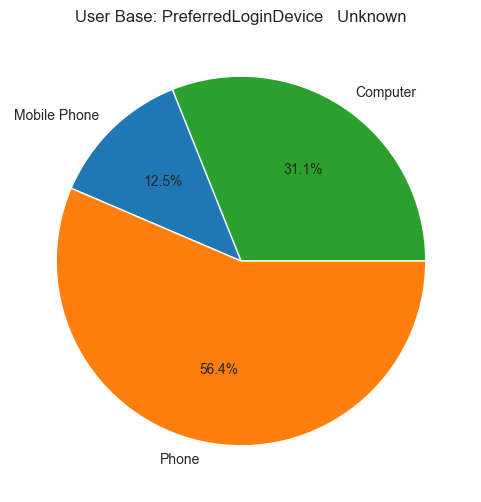


Column: PreferredLoginDevice


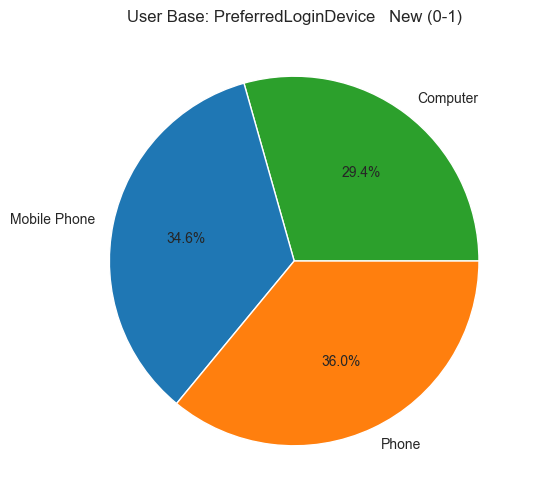


Column: PreferredPaymentMode


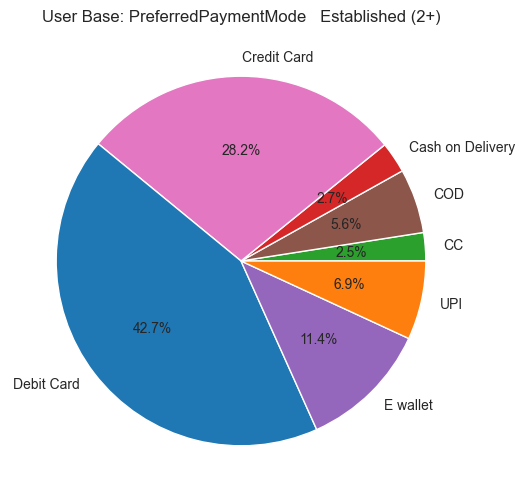


Column: PreferredPaymentMode


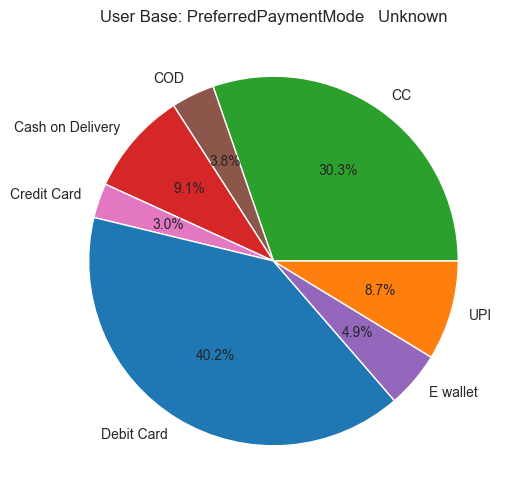


Column: PreferredPaymentMode


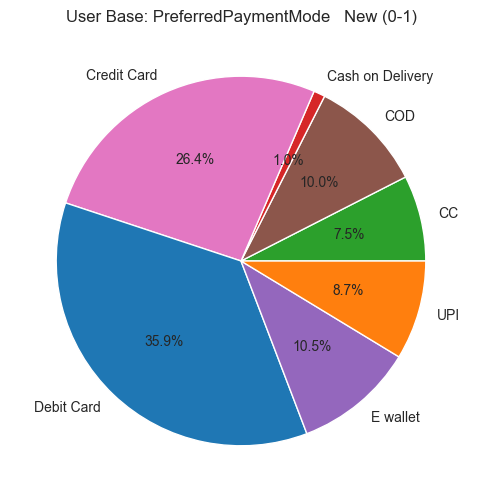


Column: Gender


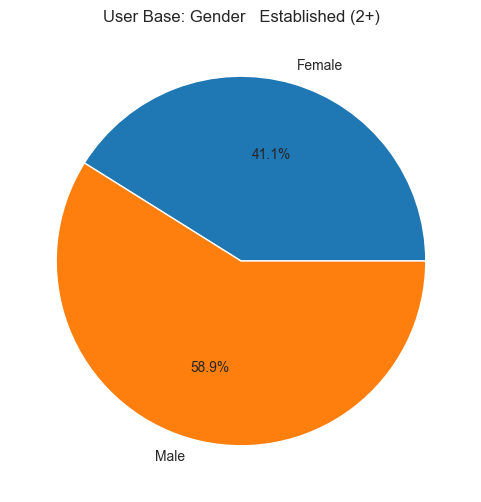


Column: Gender


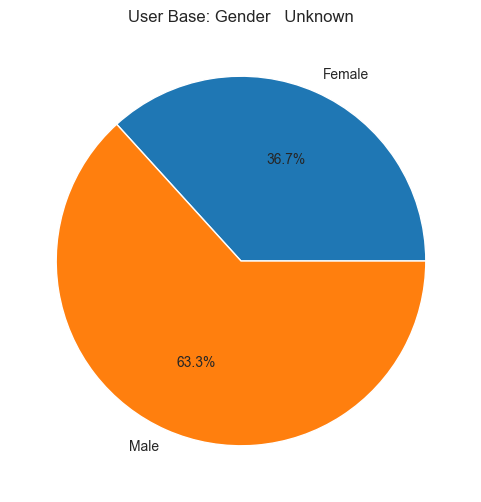


Column: Gender


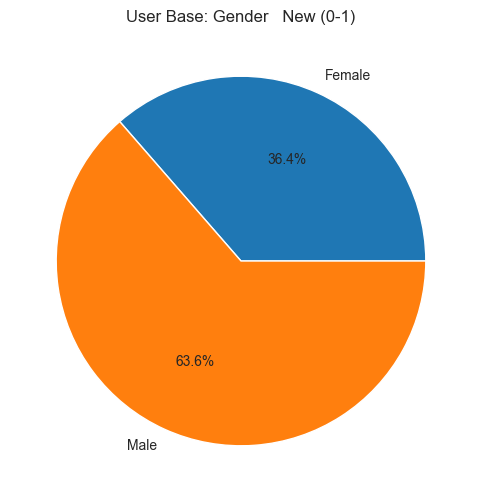


Column: PreferedOrderCat


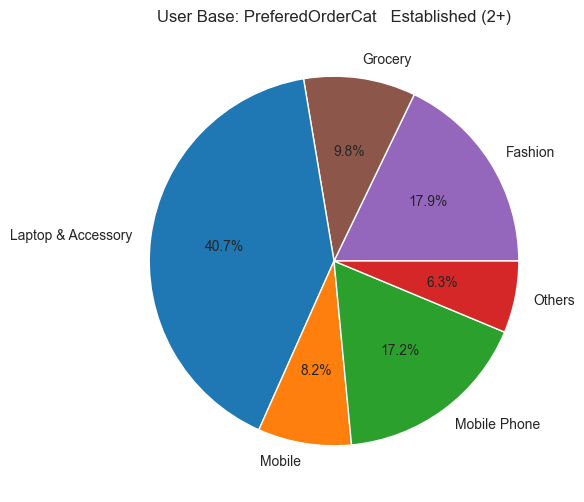


Column: PreferedOrderCat


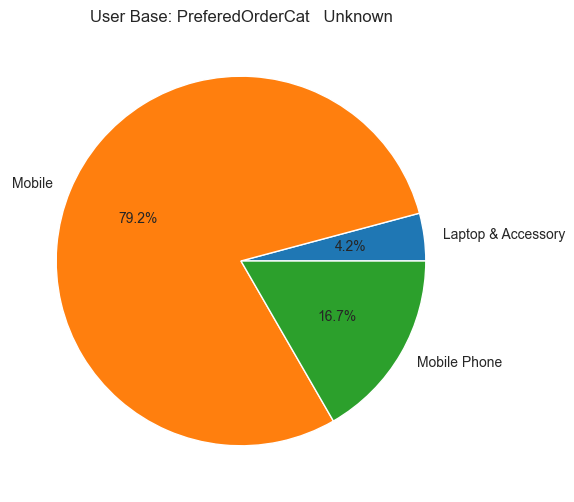


Column: PreferedOrderCat


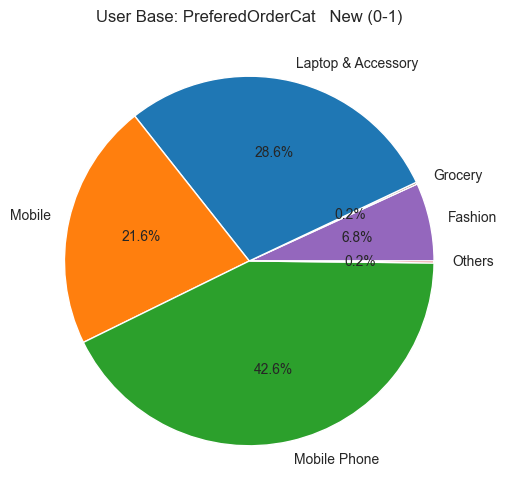


Column: MaritalStatus


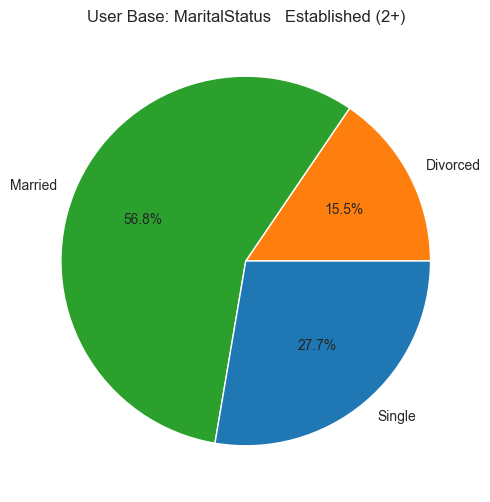


Column: MaritalStatus


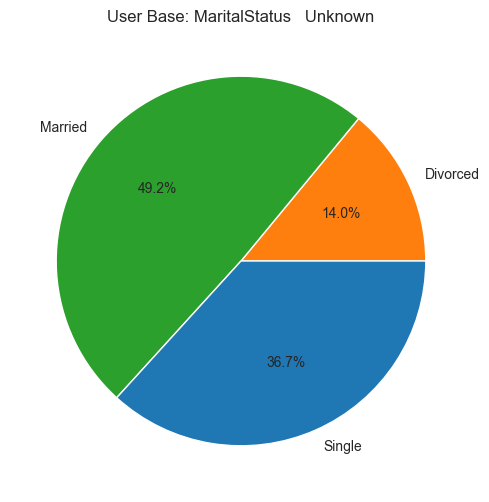


Column: MaritalStatus


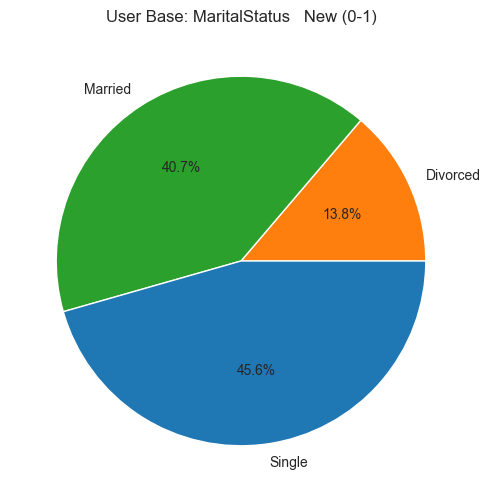


Column: TenureBin


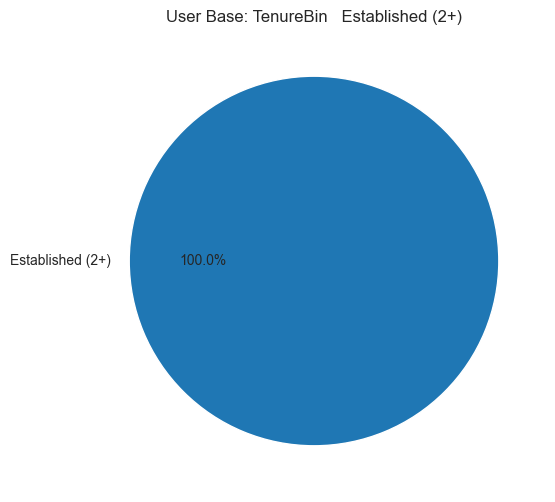


Column: TenureBin


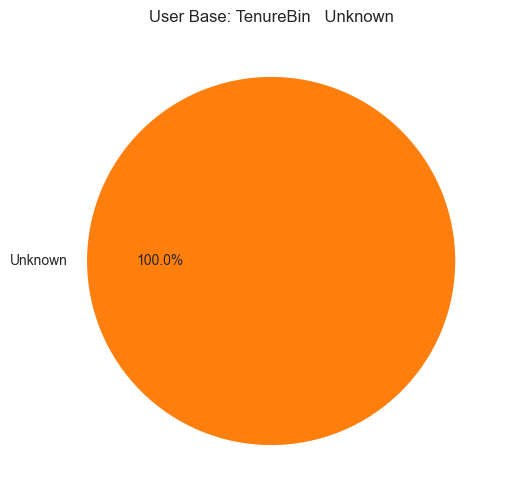


Column: TenureBin


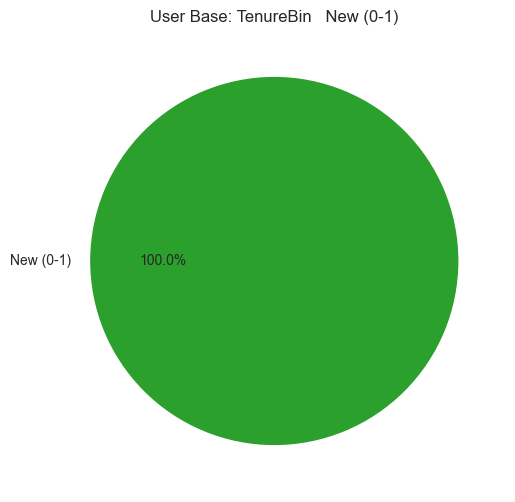

In [715]:
import matplotlib

for col in dft.columns:
    unique_values = dft[col].unique()

    # Generate a list of unique colors
    colors = matplotlib.colormaps['tab10']
    
    # Create a dictionary mapping each unique value to a unique color
    color_dict = {value: colors(i) for i, value in enumerate(unique_values)}

    for cnt, tenure_bin in enumerate(dft['TenureBin'].unique()):

        if dft[col].dtype == 'object':
            print(f"\nColumn: {col}")
            
            percentages = dft.loc[dft['TenureBin'] == tenure_bin, col].value_counts(normalize=True).sort_index() * 100
            pie_colors = [color_dict[value] for value in percentages.index]

                    # Create a pie chart
            plt.figure(figsize=(6, 6))
            plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=pie_colors )
            plt.title(f'User Base: {col}   ' + tenure_bin)
            plt.show()

ValueError: Invalid RGBA argument: 'Mobile Phone'

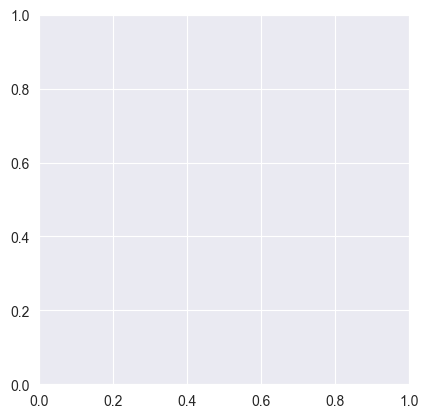

In [714]:
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=color_dict)

<Axes: xlabel='Tenure'>

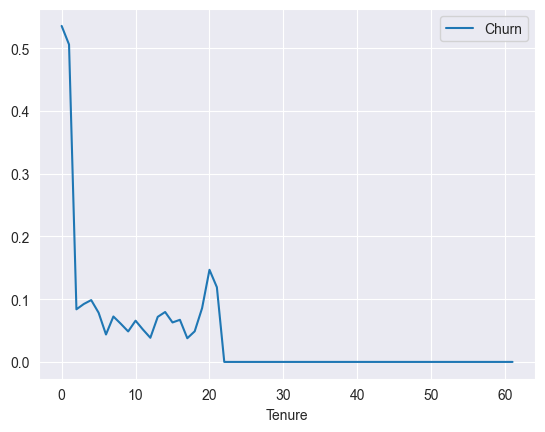

In [213]:


#plot churn rate by tenure
df.groupby('Tenure').agg({'Churn': 'mean'}).plot()


<Axes: xlabel='Tenure'>

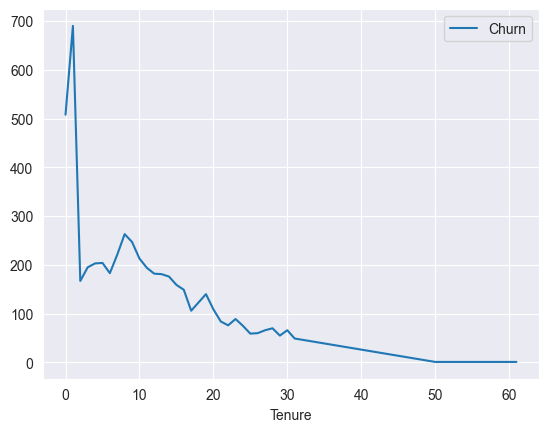

In [214]:
df.groupby('Tenure').agg({'Churn': 'count'}).plot()


In [ ]:
df.groupby('Tenure').agg({'Churn': 'mean'}).plot()

<Axes: xlabel='CashbackAmount', ylabel='Churn'>

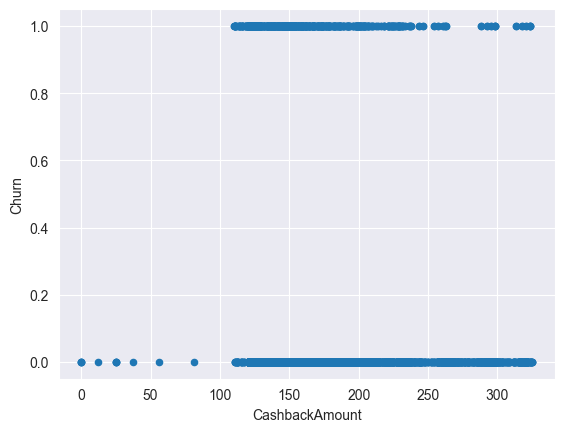

In [648]:
#Compare churn probability over cashback amount
df.plot.scatter(x='CashbackAmount', y='Churn')

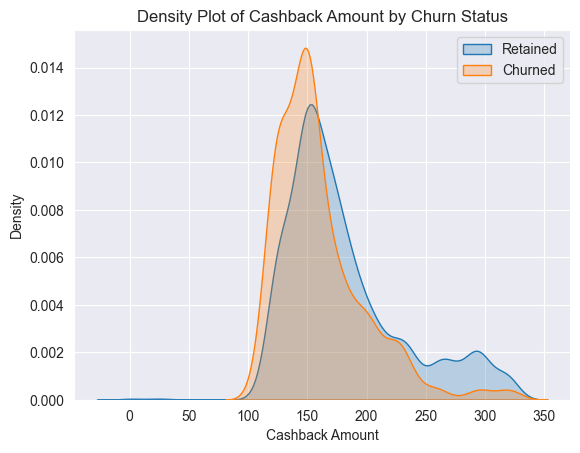

In [651]:
import seaborn as sns

# Create separate density plots for 'CashbackAmount' for each category of 'Churn'
sns.kdeplot(data=df[df['Churn'] == 0]['CashbackAmount'], label='Retained', fill=True)
sns.kdeplot(data=df[df['Churn'] == 1]['CashbackAmount'], label='Churned', fill=True)

# Add labels and title
plt.xlabel('Cashback Amount')
plt.ylabel('Density')
plt.title('Density Plot of Cashback Amount by Churn Status')

# Add a legend
plt.legend()

# Display the plot
plt.show()

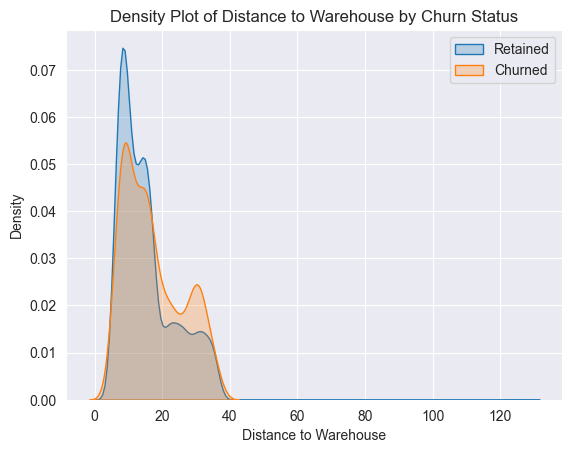

In [652]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate density plots for 'WarehouseToHome' for each category of 'Churn'
sns.kdeplot(data=df[df['Churn'] == 0]['WarehouseToHome'], label='Retained', fill=True)
sns.kdeplot(data=df[df['Churn'] == 1]['WarehouseToHome'], label='Churned', fill=True)

# Add labels and title
plt.xlabel('Distance to Warehouse')
plt.ylabel('Density')
plt.title('Density Plot of Distance to Warehouse by Churn Status')

# Add a legend
plt.legend()

# Display the plot
plt.show()

Time to put the CX hat on... what matters for CX? 
 
experience:  
PreferedOrderCat  
PreferredLoginDevice  
PreferredPaymentMode  
NumberOfAddresses?  
NumberOfDeviceRegistered?  
OrderCount
  

result:
Churn  
Complain  
DaySinceLastOrder  
OrderCount  
SatisfactionScore  

In [688]:
#Make a dataframe with a column for tenure bin and excluding Tenure Nulls
dft = df.copy(deep=True)

dft['TenureBin'] = dft.apply(lambda x: 'Unknown' if pd.isnull(x['Tenure']) else ('New (0-1)' if x['Tenure'] <= 1 else 'Established (2+)'), axis=1)


PreferedOrderCat    TenureBin       
Fashion             Established (2+)     744
                    New (0-1)             82
Grocery             Established (2+)     408
                    New (0-1)              2
Laptop & Accessory  Established (2+)    1696
                    New (0-1)            343
                    Unknown               11
Mobile              Established (2+)     341
                    New (0-1)            259
                    Unknown              209
Mobile Phone        Established (2+)     717
                    New (0-1)            510
                    Unknown               44
Others              Established (2+)     262
                    New (0-1)              2
dtype: int64


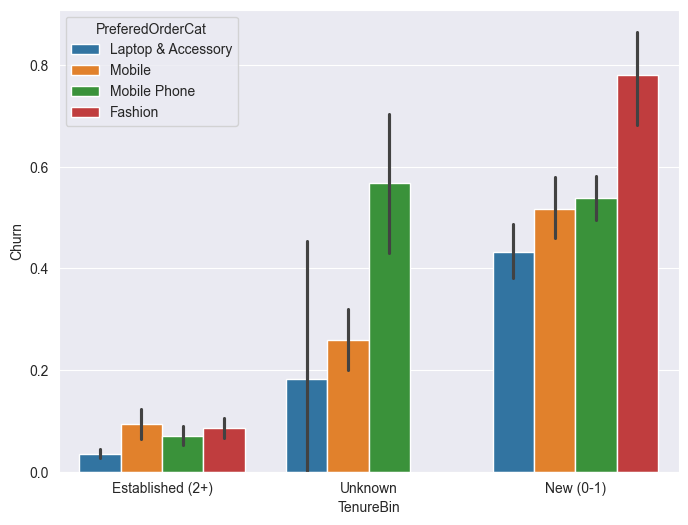

In [689]:
print(dft.groupby(['PreferedOrderCat','TenureBin']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft[(dft['PreferedOrderCat'] != 'Others') & (dft['PreferedOrderCat'] != 'Grocery')]

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='PreferedOrderCat', data=dfp, errorbar='ci')
plt.show()

PreferedOrderCat
Fashion                826
Grocery                410
Laptop & Accessory    2050
Mobile                 809
Mobile Phone          1271
Others                 264
dtype: int64


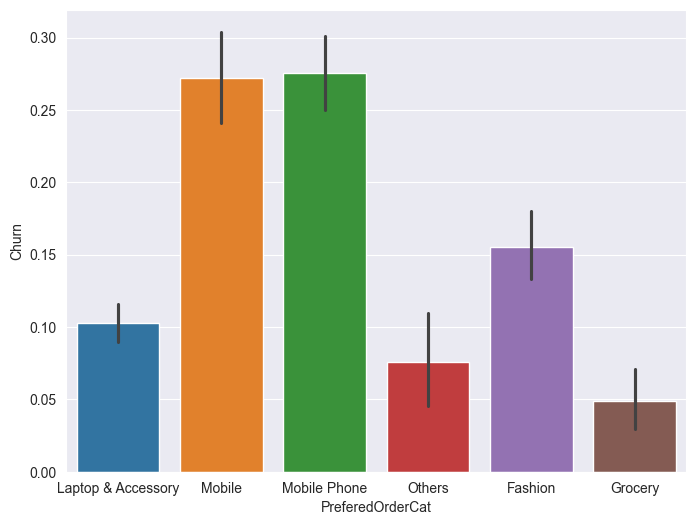

In [690]:
print(dft.groupby(['PreferedOrderCat']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
#dfp = dft[(dft['PreferedOrderCat'] != 'Others') & (dft['PreferedOrderCat'] != 'Grocery')]
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferedOrderCat', y='Churn', hue='PreferedOrderCat', data=dfp, errorbar='ci')
plt.show()

PreferedOrderCat    TenureBin       
Fashion             Established (2+)     744
                    New (0-1)             82
Grocery             Established (2+)     408
                    New (0-1)              2
Laptop & Accessory  Established (2+)    1696
                    New (0-1)            343
                    Unknown               11
Mobile              Established (2+)     341
                    New (0-1)            259
                    Unknown              209
Mobile Phone        Established (2+)     717
                    New (0-1)            510
                    Unknown               44
Others              Established (2+)     262
                    New (0-1)              2
dtype: int64


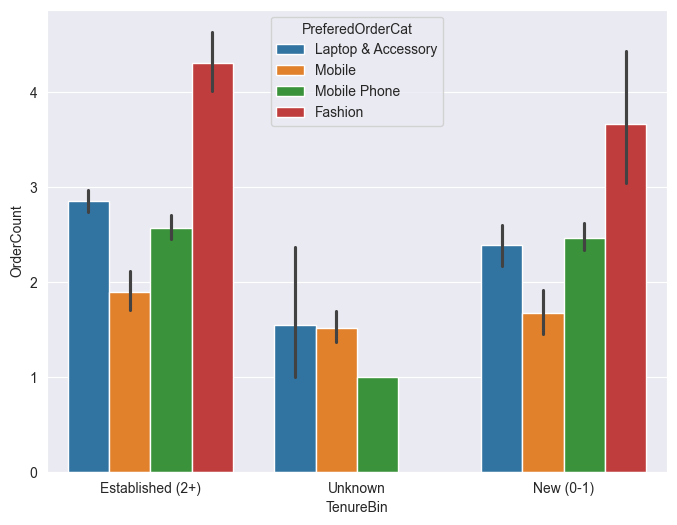

In [691]:
print(dft.groupby(['PreferedOrderCat','TenureBin']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft[(dft['PreferedOrderCat'] != 'Others') & (dft['PreferedOrderCat'] != 'Grocery')]

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='PreferedOrderCat', data=dfp, errorbar='ci')
plt.show()

In [ ]:
print(dft.groupby(['PreferedOrderCat','TenureBin']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft[(dft['PreferedOrderCat'] != 'Others') & (dft['PreferedOrderCat'] != 'Grocery')]

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='OrderCount', hue='PreferedOrderCat', data=dfp, errorbar='ci')
plt.show()

In [267]:
from scipy.stats import binomtest

binomtest(64, 82).proportion_ci()

ConfidenceInterval(low=0.6754450772522136, high=0.8644075792293539)

PreferredLoginDevice  TenureBin       
Computer              Established (2+)    1200
                      New (0-1)            352
Mobile Phone          Established (2+)    2317
                      New (0-1)            415
Phone                 Established (2+)     651
                      New (0-1)            431
dtype: int64


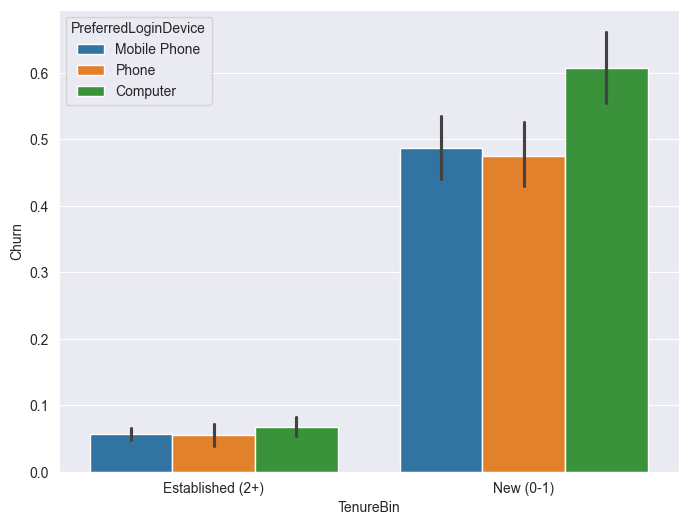

In [298]:
print(dft.groupby(['PreferredLoginDevice','TenureBin']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='PreferredLoginDevice', data=dfp, errorbar='ci')
plt.show()

PreferredPaymentMode  TenureBin       
CC                    Established (2+)     103
                      New (0-1)             90
COD                   Established (2+)     235
                      New (0-1)            120
Cash on Delivery      Established (2+)     113
                      New (0-1)             12
Credit Card           Established (2+)    1177
                      New (0-1)            316
Debit Card            Established (2+)    1778
                      New (0-1)            430
E wallet              Established (2+)     475
                      New (0-1)            126
UPI                   Established (2+)     287
                      New (0-1)            104
dtype: int64


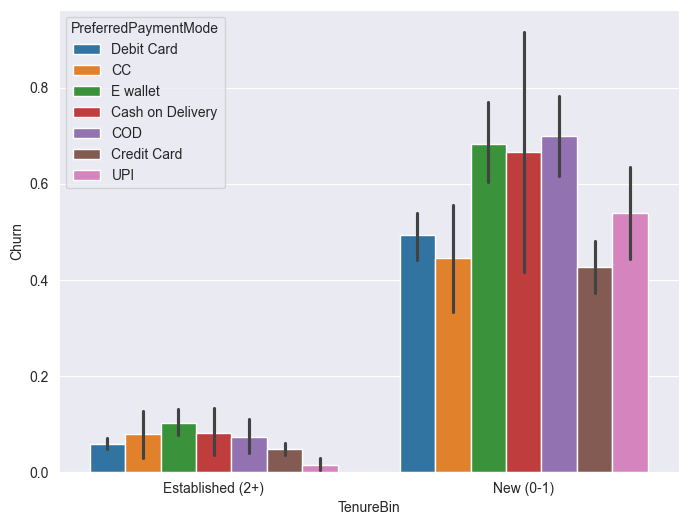

In [300]:
print(dft.groupby(['PreferredPaymentMode','TenureBin']).size())
import seaborn as sns
plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='PreferredPaymentMode', data=dfp, errorbar='ci')
plt.show()

NumberOfDeviceRegistered  TenureBin       
1                         Established (2+)     168
                          New (0-1)             52
2                         Established (2+)     208
                          New (0-1)             66
3                         Established (2+)    1230
                          New (0-1)            303
4                         Established (2+)    1820
                          New (0-1)            494
5                         Established (2+)     634
                          New (0-1)            229
6                         Established (2+)     108
                          New (0-1)             54
dtype: int64


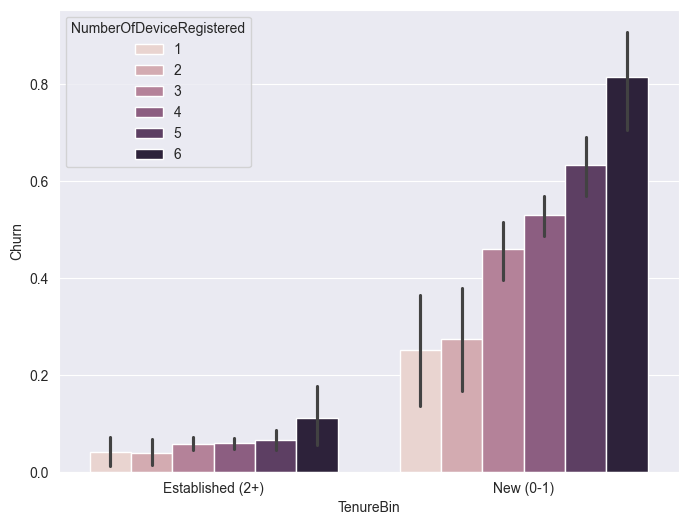

In [302]:
plt.show()
print(dft.groupby(['NumberOfDeviceRegistered', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='NumberOfDeviceRegistered', data=dfp, errorbar='ci')
plt.show()

In [503]:
df['Engagement'] = (
        df['HourSpendOnApp'] + 
        df['NumberOfAddress'] + 
        df['NumberOfDeviceRegistered'] 
)

In [504]:
df['Engagement']

0       15.0
1       14.0
2       12.0
3       14.0
4        NaN
        ... 
5625    11.0
5626    14.0
5627     8.0
5628    13.0
5629     9.0
Name: Engagement, Length: 5630, dtype: float64

In [490]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(dft['NumberOfDeviceRegistered'], dft['TenureBin'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")

Chi-square statistic: 27.917290928680558
p-value: 3.777914432690214e-05


                            OLS Regression Results                            
Dep. Variable:         CashbackAmount   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     309.8
Date:                Thu, 09 May 2024   Prob (F-statistic):          4.95e-128
Time:                        17:08:52   Log-Likelihood:                -28173.
No. Observations:                5366   AIC:                         5.635e+04
Df Residuals:                    5363   BIC:                         5.637e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

NumberOfDeviceRegistered  TenureBin       
1                         Established (2+)     168
                          New (0-1)             52
2                         Established (2+)     208
                          New (0-1)             66
3                         Established (2+)    1230
                          New (0-1)            303
4                         Established (2+)    1820
                          New (0-1)            494
5                         Established (2+)     634
                          New (0-1)            229
6                         Established (2+)     108
                          New (0-1)             54
dtype: int64


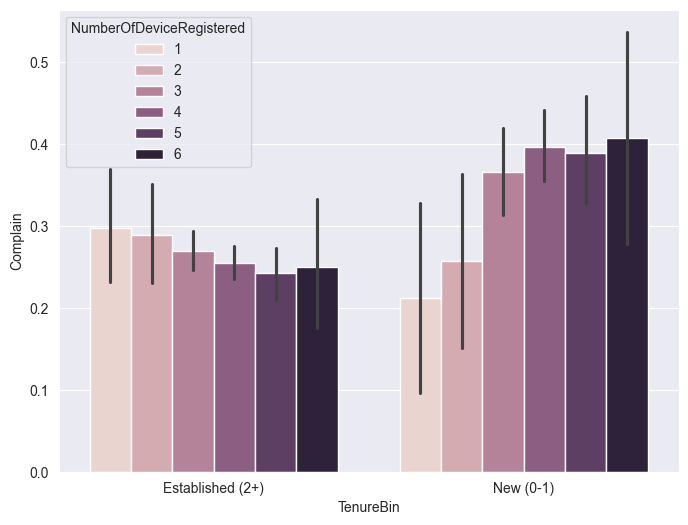

In [304]:
plt.show()
print(dft.groupby(['NumberOfDeviceRegistered', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Complain', hue='NumberOfDeviceRegistered', data=dfp, errorbar='ci')
plt.show()

NumberOfAddress  TenureBin       
1                Established (2+)    253
                 New (0-1)            92
2                Established (2+)    827
                 New (0-1)           399
3                Established (2+)    879
                 New (0-1)           378
4                Established (2+)    514
                 New (0-1)            56
5                Established (2+)    506
                 New (0-1)            39
6                Established (2+)    332
                 New (0-1)            48
7                Established (2+)    187
                 New (0-1)            55
8                Established (2+)    218
                 New (0-1)            56
9                Established (2+)    200
                 New (0-1)            37
10               Established (2+)    165
                 New (0-1)            24
11               Established (2+)     85
                 New (0-1)            13
20               New (0-1)             1
21               Establ

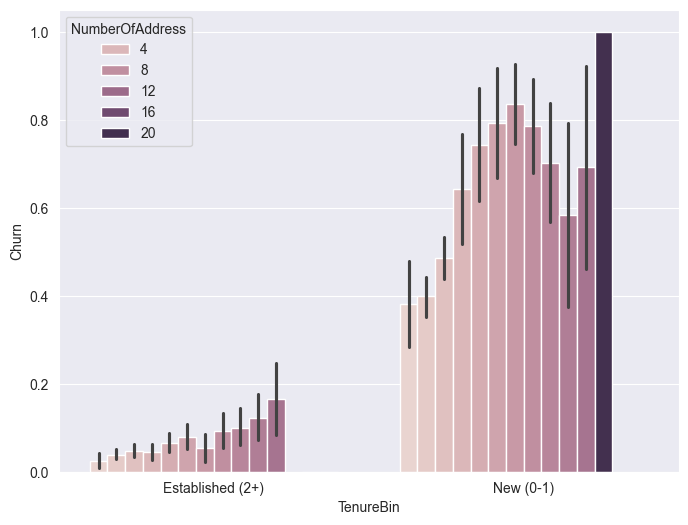

In [308]:
plt.show()
print(dft.groupby(['NumberOfAddress', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='NumberOfAddress', data=dfp, errorbar='ci')
plt.show()

HourSpendOnApp  TenureBin       
0.0             Established (2+)       3
1.0             Established (2+)      33
2.0             Established (2+)    1060
                New (0-1)            273
3.0             Established (2+)    1981
                New (0-1)            583
4.0             Established (2+)     933
                New (0-1)            242
5.0             Established (2+)       2
                New (0-1)              1
dtype: int64


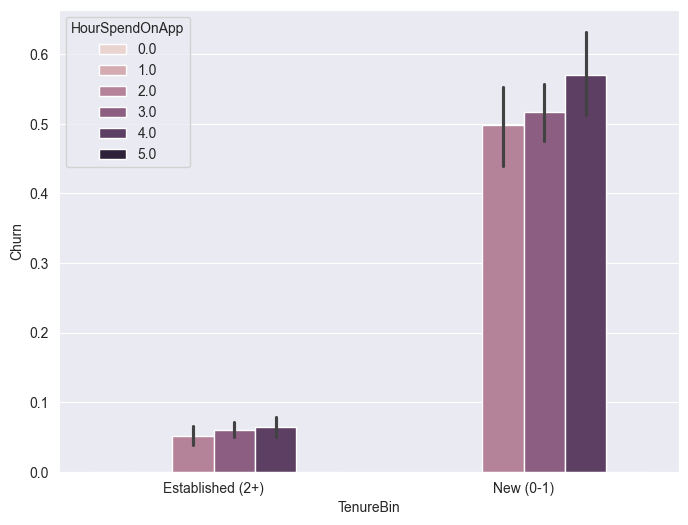

In [312]:
plt.show()
print(dft.groupby(['HourSpendOnApp', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='HourSpendOnApp', data=dfp, errorbar='ci')
plt.show()

PreferedOrderCat
Fashion                826
Grocery                410
Laptop & Accessory    2039
Mobile                 600
Mobile Phone          1227
Others                 264
dtype: int64


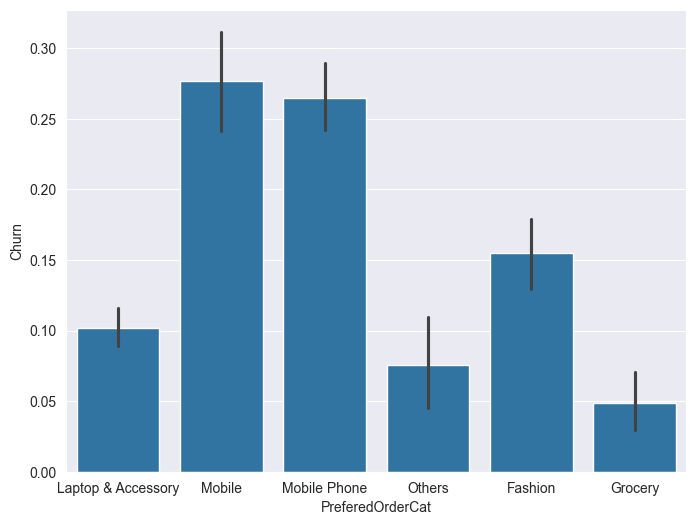

In [589]:
plt.show()
print(dft.groupby(['PreferedOrderCat']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferedOrderCat', y='Churn', data=dfp, errorbar='ci')
plt.show()

MaritalStatus  TenureBin       
Divorced       Established (2+)     646
               New (0-1)            165
Married        Established (2+)    2369
               New (0-1)            487
Single         Established (2+)    1153
               New (0-1)            546
dtype: int64


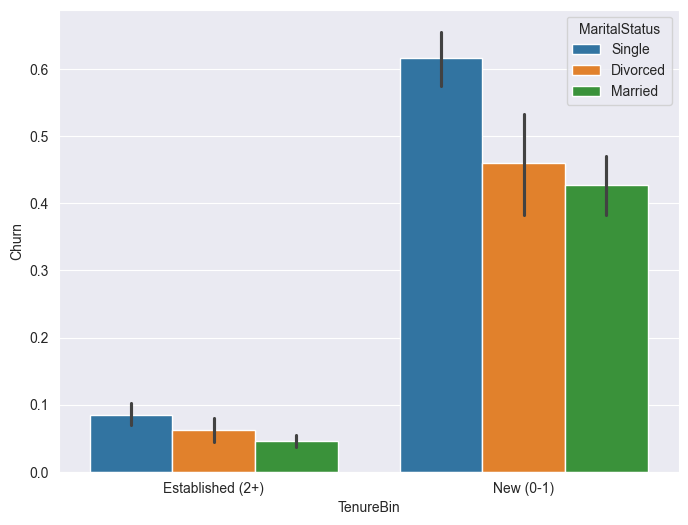

In [318]:
plt.show()
print(dft.groupby(['Preferred ', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='MaritalStatus', data=dfp, errorbar='ci')
plt.show()

CouponUsed  TenureBin       
0.0         Established (2+)     669
            New (0-1)            238
1.0         Established (2+)    1484
            New (0-1)            500
2.0         Established (2+)     951
            New (0-1)            319
3.0         Established (2+)     260
            New (0-1)             64
4.0         Established (2+)     172
            New (0-1)             24
5.0         Established (2+)     112
            New (0-1)             16
6.0         Established (2+)      93
            New (0-1)             13
7.0         Established (2+)      77
            New (0-1)             12
8.0         Established (2+)      38
            New (0-1)              4
9.0         Established (2+)      12
            New (0-1)              1
10.0        Established (2+)      13
            New (0-1)              1
11.0        Established (2+)      12
12.0        Established (2+)       9
13.0        Established (2+)       8
14.0        Established (2+)       5
15.0     

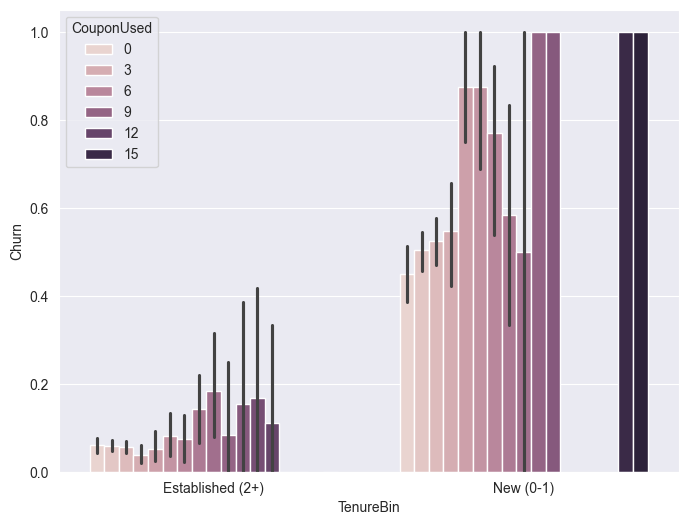

In [327]:
plt.show()
print(dft.groupby(['CouponUsed', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='CouponUsed', data=dfp, errorbar='ci')
plt.show()

OrderAmountHikeFromlastYear  TenureBin       
11.0                         Established (2+)    268
                             New (0-1)            91
12.0                         Established (2+)    517
                             New (0-1)           174
13.0                         Established (2+)    544
                             New (0-1)           158
14.0                         Established (2+)    556
                             New (0-1)           144
15.0                         Established (2+)    426
                             New (0-1)           104
16.0                         Established (2+)    246
                             New (0-1)            71
17.0                         Established (2+)    213
                             New (0-1)            74
18.0                         Established (2+)    232
                             New (0-1)            73
19.0                         Established (2+)    233
                             New (0-1)            69


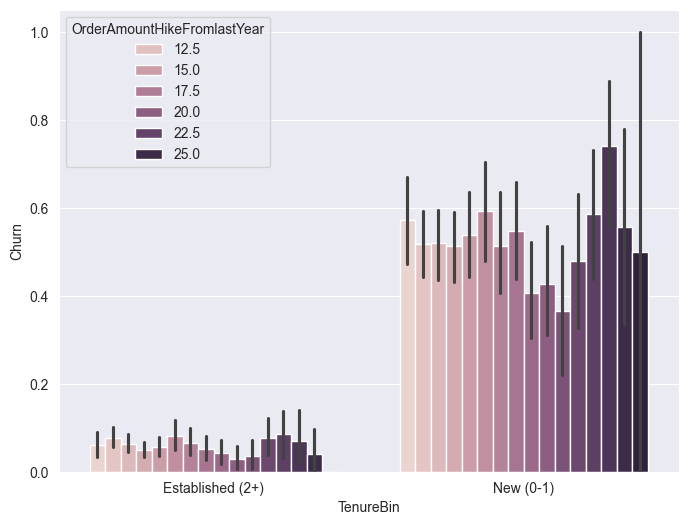

In [330]:
plt.show()
print(dft.groupby(['OrderAmountHikeFromlastYear', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='OrderAmountHikeFromlastYear', data=dfp, errorbar='ci')
plt.show()

Gender  TenureBin       
Female  Established (2+)    1713
        New (0-1)            436
Male    Established (2+)    2455
        New (0-1)            762
dtype: int64


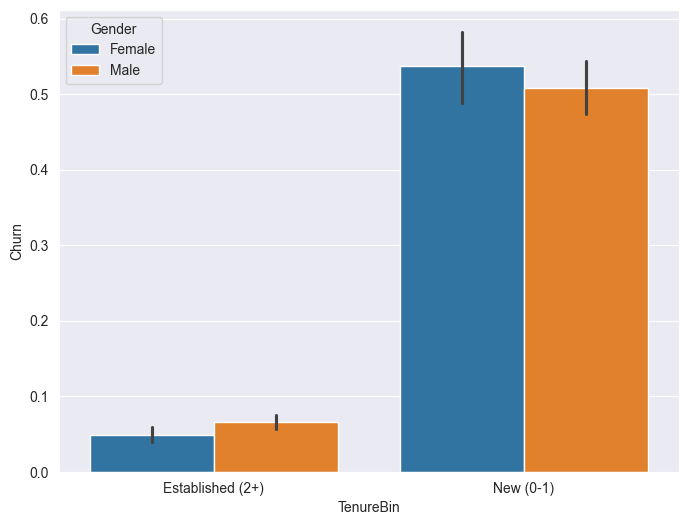

In [332]:
plt.show()
print(dft.groupby(['Gender', 'TenureBin']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)

# Create the bar plot and add confidence intervals
sns.barplot(x='TenureBin', y='Churn', hue='Gender', data=dfp, errorbar='ci')
plt.show()

TenureBin         PreferredLoginDevice
Established (2+)  Computer                1200
                  Mobile Phone            2317
                  Phone                    651
New (0-1)         Computer                 352
                  Mobile Phone             415
                  Phone                    431
dtype: int64


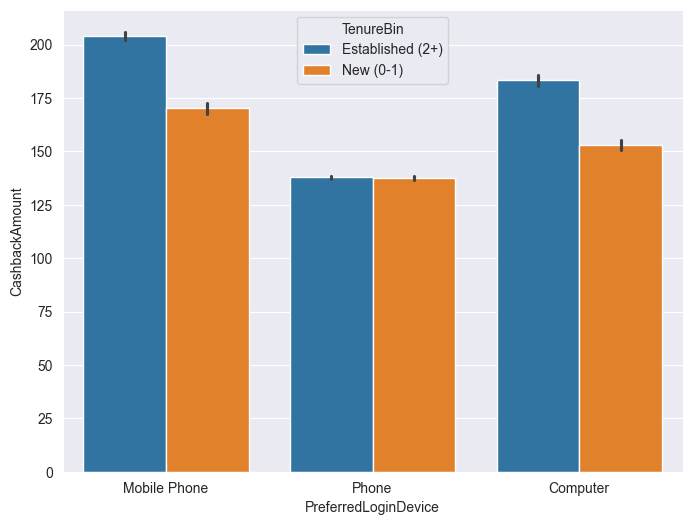

In [588]:
plt.show()
plt.show()
print(dft.groupby(['TenureBin','PreferredLoginDevice']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["TenureBin"] == "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferredLoginDevice', y='CashbackAmount', hue='TenureBin', data=dfp, errorbar='ci')
plt.show()

Churn  PreferredLoginDevice
0      Computer                1258
       Mobile Phone            2400
       Phone                    841
1      Computer                 294
       Mobile Phone             332
       Phone                    241
dtype: int64


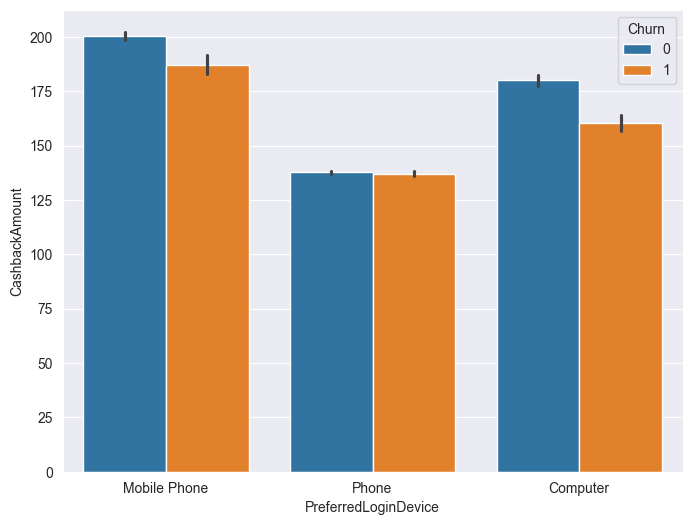

In [586]:
plt.show()
plt.show()
print(dft.groupby(['Churn','PreferredLoginDevice']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferredLoginDevice', y='CashbackAmount', hue='Churn', data=dfp, errorbar='ci')
plt.show()

TenureBin         PreferredLoginDevice
Established (2+)  Computer                1200
                  Mobile Phone            2317
                  Phone                    651
New (0-1)         Computer                 352
                  Mobile Phone             415
                  Phone                    431
dtype: int64


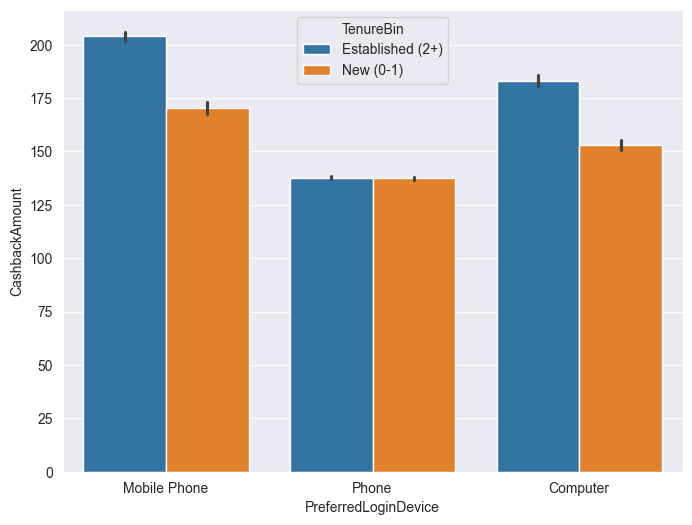

In [469]:
plt.show()
plt.show()
print(dft.groupby(['TenureBin','PreferredLoginDevice']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferredLoginDevice', y='CashbackAmount', hue='TenureBin', data=dfp, errorbar='ci')
plt.show()

TenureBin         PreferedOrderCat  
Established (2+)  Fashion                744
                  Grocery                408
                  Laptop & Accessory    1696
                  Mobile                 341
                  Mobile Phone           717
                  Others                 262
New (0-1)         Fashion                 82
                  Grocery                  2
                  Laptop & Accessory     343
                  Mobile                 259
                  Mobile Phone           510
                  Others                   2
dtype: int64


TypeError: Axes.bxp() got an unexpected keyword argument 'errorbar'

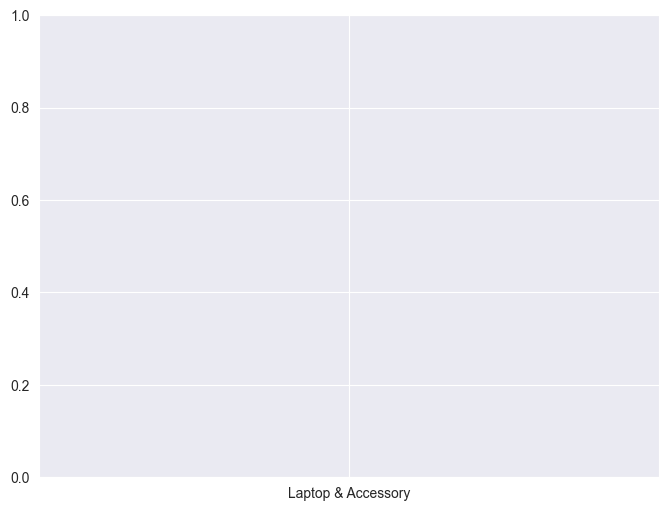

In [471]:
plt.show()
plt.show()
print(dft.groupby(['TenureBin','PreferedOrderCat']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.barplot(x='PreferedOrderCat', y='CashbackAmount', hue='TenureBin', data=dfp, errorbar='ci')
plt.show()

Churn  PreferedOrderCat  
0      Fashion                698
       Grocery                390
       Laptop & Accessory    1831
       Mobile                 434
       Mobile Phone           902
       Others                 244
1      Fashion                128
       Grocery                 20
       Laptop & Accessory     208
       Mobile                 166
       Mobile Phone           325
       Others                  20
dtype: int64


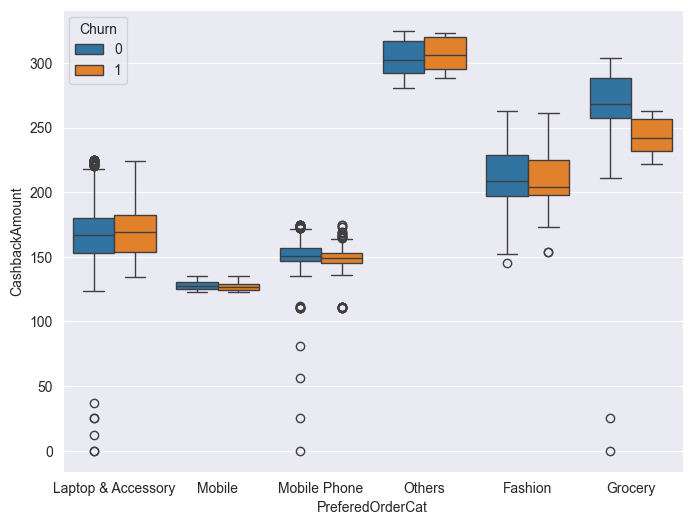

In [474]:

print(dft.groupby(['Churn', 'PreferedOrderCat']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.boxplot(x='PreferedOrderCat', y='CashbackAmount', hue='Churn', data=dfp)
plt.show()

Churn
0    4499
1     867
dtype: int64


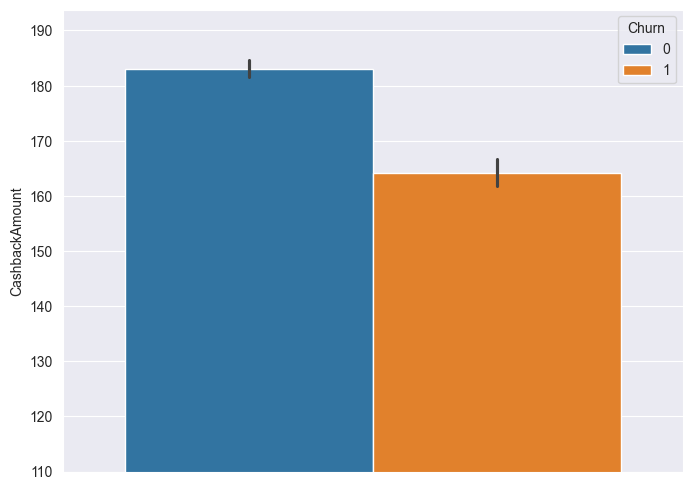

In [596]:
print(dft.groupby(['Churn']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.barplot( y='CashbackAmount', hue='Churn', data=dfp, errorbar = 'ci')
plt.ylim(110,None)
plt.show()

Churn  PreferedOrderCat  
0      Fashion                698
       Grocery                390
       Laptop & Accessory    1831
       Mobile                 434
       Mobile Phone           902
       Others                 244
1      Fashion                128
       Grocery                 20
       Laptop & Accessory     208
       Mobile                 166
       Mobile Phone           325
       Others                  20
dtype: int64


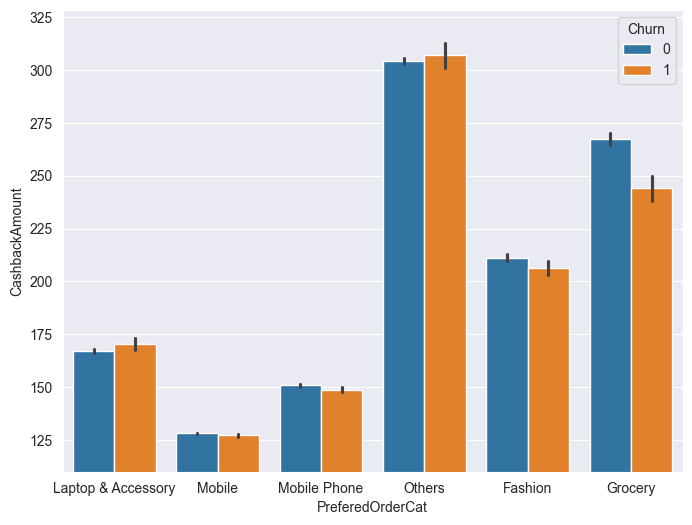

In [598]:
print(dft.groupby(['Churn','PreferedOrderCat']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.barplot( y='CashbackAmount', x='PreferedOrderCat',hue='Churn', data=dfp, errorbar = 'ci')
plt.ylim(110,None)
plt.show()

CashbackAmount  PreferredLoginDevice
0.00            Computer                2
                Mobile Phone            2
12.00           Mobile Phone            1
25.00           Computer                2
                Mobile Phone            2
                                       ..
323.59          Mobile Phone            2
324.26          Mobile Phone            2
324.43          Mobile Phone            2
324.73          Computer                2
324.99          Mobile Phone            2
Length: 2599, dtype: int64


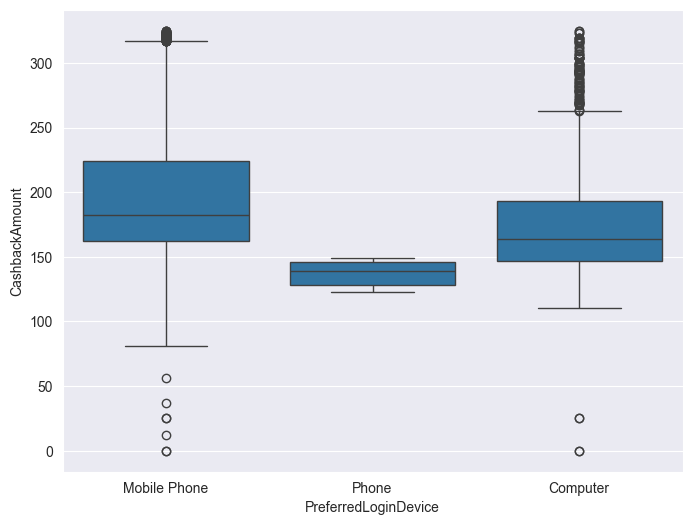

In [583]:
plt.show()

print(dft.groupby(['CashbackAmount', 'PreferredLoginDevice']).size())
import seaborn as sns

plt.figure(figsize=(8, 6))
# Group the data and calculate the mean churn rate
dfp = dft.copy(deep=True)
#dfp = dfp[dfp["Tenure Bin"] != "New (0-1)"] 

# Create the bar plot and add confidence intervals
sns.boxplot(x='PreferredLoginDevice', y='CashbackAmount', data=dfp)
plt.show()